In [1]:
%matplotlib inline
from random import randint
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from scipy.stats import skew
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_roc_curve, plot_confusion_matrix, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split, RepeatedStratifiedKFold#For splitting
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from optuna.integration import LightGBMPruningCallback
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import optuna  # pip install optuna
from sklearn.metrics import log_loss


import warnings
warnings.filterwarnings("ignore")

from sklearn.utils.fixes import loguniform

#features_train, features_test, labels_train, labels_test = train_test_split(
#    features, labels, test_size=0.3, random_state=42
#)


C:\Users\Pearse\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df= pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
214736,139801.0,-1.142093,0.906278,-0.066498,-2.382138,0.426206,-0.478678,0.252919,-0.333573,0.220783,...,0.950580,0.403424,-0.151933,0.856615,-0.060880,0.706346,0.223867,0.116958,1.00,0
26787,34251.0,1.082133,-0.159495,0.730236,0.903029,-0.715731,-0.366161,-0.181998,0.052246,0.608182,...,-0.234700,-0.596962,0.121918,0.412009,0.182742,0.188141,-0.010300,0.022221,44.95,0
132642,80063.0,1.190273,0.320734,0.416012,0.719273,-0.336222,-0.787379,0.021522,-0.090768,-0.006041,...,-0.237626,-0.648819,0.198114,0.362310,0.102620,0.103649,-0.005624,0.030891,1.79,0
43999,41739.0,1.213851,-0.210118,0.826140,0.057223,-1.061724,-0.719316,-0.556333,0.094042,0.391652,...,0.124062,0.299337,0.015379,0.574461,0.130610,1.046060,-0.072526,-0.001501,1.00,0
56842,47628.0,-0.536102,-0.355027,0.893965,-2.185675,-0.905037,-0.983917,1.187667,-0.163212,1.305094,...,-0.064617,-0.366570,0.438442,0.371015,-0.169661,-0.441536,-0.002763,0.074166,199.00,0
19150,30051.0,-1.842114,1.207806,1.834198,-2.135850,-1.379959,-0.655930,-0.658435,1.089062,1.004176,...,0.374485,1.114714,-0.257343,0.420817,0.592414,-0.639855,0.233586,0.076855,2.00,0
5463,5470.0,1.274637,1.436970,-1.876524,1.547028,1.732147,-0.686776,0.691359,-0.349729,0.675124,...,-0.381586,-0.644689,-0.315916,-1.303905,0.949290,-0.244602,0.037615,0.080543,4.49,0
158476,111304.0,1.433230,-1.731970,-2.510473,-1.740907,0.066269,-0.588319,0.582863,-0.473450,3.455102,...,-0.175904,-0.904428,-0.269841,-0.364781,0.150904,-1.054807,-0.080420,0.006771,410.06,0
145863,87236.0,-2.580445,0.511285,-3.791646,-3.295621,2.892114,1.989028,-0.252019,1.862008,0.087404,...,0.261190,0.497500,-0.380765,0.819174,-0.203353,0.540101,0.095450,0.118786,1.00,0
117742,74791.0,-0.057017,0.822460,-0.964387,-2.975748,1.373410,-1.818082,2.231105,-0.984326,0.441506,...,0.293667,1.219066,-0.885084,-0.459677,1.385389,-0.254337,-0.272580,-0.220873,19.39,0


In [4]:
len(df.columns)

31

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
len(df)

284807

In [11]:
#profile = ProfileReport(df, title="Creditcard Fraud Profiling Report", explorative=True, minimal =True)
#profile

In [12]:
#profile.to_file(output_file="Creditcard Fraud Profile Report.pdf")

In [13]:
#profile.to_file(output_file="Creditcard Fraud Profile Report.html")

In [14]:
#profile.to_widgets()

In [15]:
#profile.to_notebook_iframe()

## Checking Correlation

In [16]:
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_corr
#df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
#df_corr[df_corr['Feature 1'] == 'Age']
# To see the correlation of the 'Age' feature and other features.
# Age is not correlated with 'PassengerId', so it doesn't have any effect on the target.
# 'Survived' is the feature I'm trying to predict. 

,level_0,level_1,0
0,V3,V24,2.686834e-19
1,V24,V3,2.686834e-19
2,V22,V6,4.705235e-19
3,V6,V22,4.705235e-19
4,V16,V6,2.623672e-18
...,...,...,...
956,V25,V25,1.000000e+00
957,V26,V26,1.000000e+00
958,V27,V27,1.000000e+00
959,V14,V14,1.000000e+00


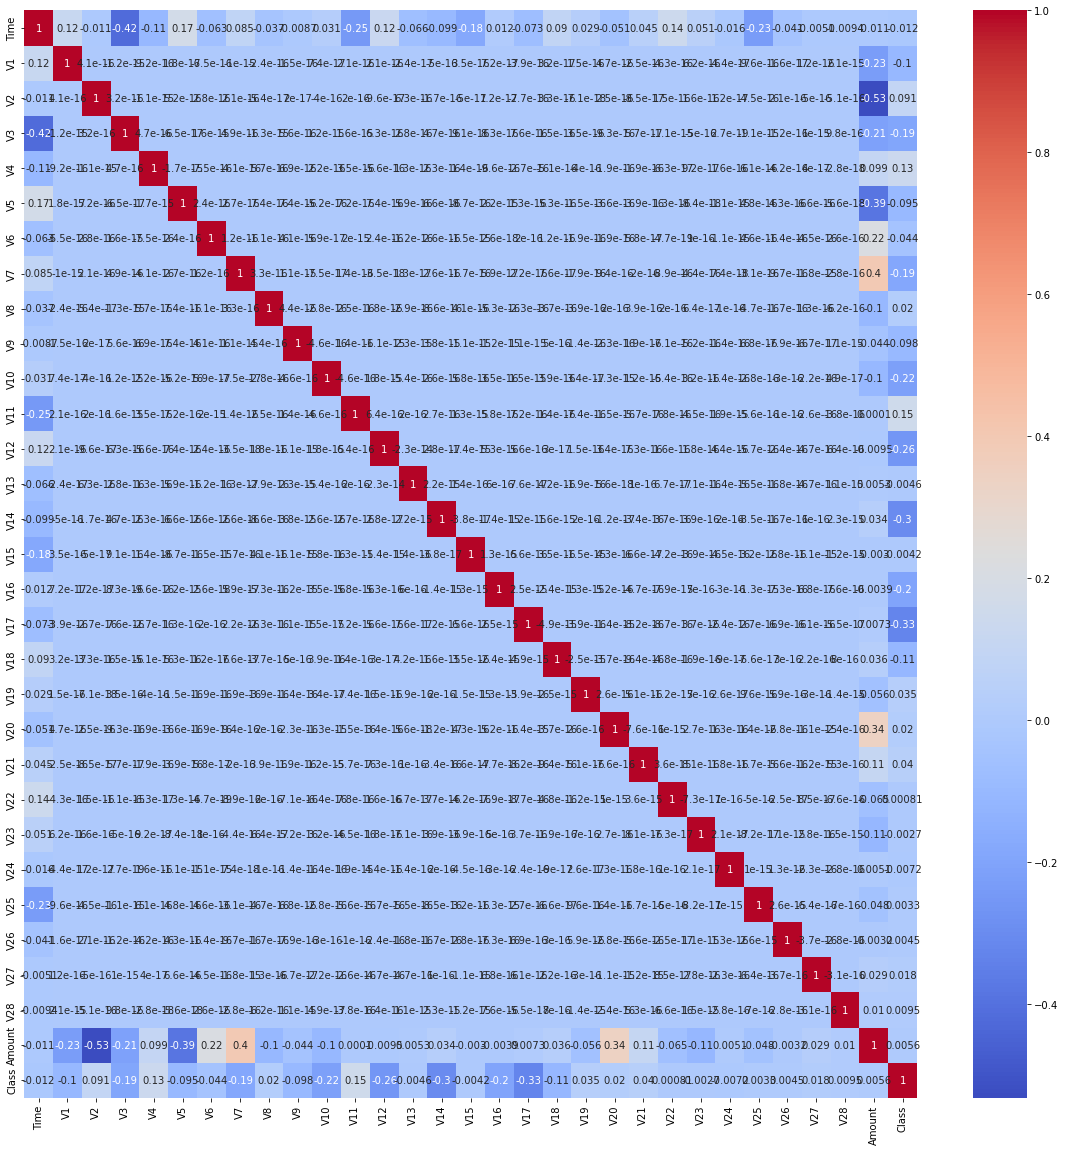

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)
plt.show()

## Scaling Some Features

In [18]:
min_max_scaler = MinMaxScaler()
df.loc[:, ['Time']] = min_max_scaler.fit_transform(df[['Time']])
std_scaler = StandardScaler()
df.loc[:, ['Amount']] = std_scaler.fit_transform(df[['Amount']])

In [19]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


## Checking the Value Counts of the Classes

In [20]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

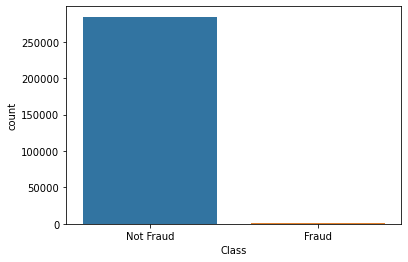

In [21]:
# plot the no of 1's and 0's
g = sns.countplot(df['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

## Training With The Imbalanced Data

In [22]:
y = df.Class
X = df.drop(['Class'], axis=1)
print(X.columns, X.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object') (284807, 30)


In [23]:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 

# Catboost
cat = CatBoostClassifier(verbose=False)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_valid)
f1_score1 = f1_score(y_valid,cat_pred)
accuracy_score1 = accuracy_score(y_valid,cat_pred)
print("CatBoost accuracy_score on validation set is : ",accuracy_score(y_valid,cat_pred))
print("CatBoost F1 score on validation set is : ",f1_score(y_valid,cat_pred))
print('--------'*20)

#RandomForest
rf =  RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)
f1_score2 = f1_score(y_valid,rf_pred)
accuracy_score2 = accuracy_score(y_valid,rf_pred)
print("RandomForest accuracy_score on validation set is : ",accuracy_score(y_valid,rf_pred))
print("RandomForest F1 score on validation set is : ",f1_score(y_valid,rf_pred))
print('--------'*20)

#DecisionTree
dt =  DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_valid)
f1_score3 = f1_score(y_valid,dt_pred)
accuracy_score3 = accuracy_score(y_valid,dt_pred)
print("DecisionTree accuracy_score on validation set is : ",accuracy_score(y_valid,dt_pred))
print("DecisionTree F1 score on validation set is : ",f1_score(y_valid,dt_pred))
print('--------'*20)


#KNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_valid)
f1_score4 = f1_score(y_valid,knn_pred)
accuracy_score4 = accuracy_score(y_valid,knn_pred)
print("KNeighbors accuracy_score on validation set is : ",accuracy_score(y_valid,knn_pred))
print("KNeighbors F1 score on validation set is : ",f1_score(y_valid,knn_pred))
print('--------'*20)



#SVC
svc =  SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_valid)
f1_score5 = f1_score(y_valid,svc_pred)
accuracy_score5 = accuracy_score(y_valid,svc_pred)
print("SVC accuracy_score on validation set is : ",accuracy_score(y_valid,svc_pred))
print("SVC F1 score on validation set is : ",f1_score(y_valid,svc_pred))
print('--------'*20)

#LinearSVC
lsvc =  LinearSVC()
lsvc.fit(X_train, y_train)
lsvc_pred = lsvc.predict(X_valid)
f1_score6 = f1_score(y_valid,lsvc_pred)
accuracy_score6 = accuracy_score(y_valid,lsvc_pred)
print("LinearSVC accuracy_score on validation set is : ",accuracy_score(y_valid,lsvc_pred))
print("LinearSVC F1 score on validation set is : ",f1_score(y_valid,lsvc_pred))
print('--------'*20)

#AdaBoost
ab =  AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_valid)
f1_score7 = f1_score(y_valid,ab_pred)
accuracy_score7 = accuracy_score(y_valid,ab_pred)
print("AdaBoost accuracy_score on validation set is : ",accuracy_score(y_valid,ab_pred))
print("AdaBoost F1 score on validation set is : ",f1_score(y_valid,ab_pred))
print('--------'*20)

#LogisticRegression
lg =  LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_valid)
f1_score8 = f1_score(y_valid,lg_pred)
accuracy_score8 = accuracy_score(y_valid,lg_pred)
print("LogisticRegression accuracy_score on validation set is : ",accuracy_score(y_valid,lg_pred))
print("LogisticRegression F1 score on validation set is : ",f1_score(y_valid,lg_pred))
print('--------'*20) 

#Naive Bayes
nb =  GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_valid)
f1_score9 = f1_score(y_valid,nb_pred)
accuracy_score9 = accuracy_score(y_valid,nb_pred)
print("Naive Bayes accuracy_score on validation set is : ",accuracy_score(y_valid,nb_pred))
print("Naive Bayes F1 score on validation set is : ",f1_score(y_valid,nb_pred))
print('--------'*20)

# LGBM
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_valid)
f1_score10 = f1_score(y_valid,lgb_pred)
accuracy_score10 = accuracy_score(y_valid,lgb_pred)
print("LGBM accuracy_score on validation set is : ",accuracy_score(y_valid,lgb_pred))
print("LGBM F1 score on validation set is : ",f1_score(y_valid,lgb_pred))
print('--------'*20)

# XGBoost
xg = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_valid)
f1_score11 = f1_score(y_valid,xg_pred)
accuracy_score11 = accuracy_score(y_valid,xg_pred)
print("XGBoost accuracy_score on validation set is : ",accuracy_score(y_valid,xg_pred))
print("XGBoost F1 score on validation set is : ",f1_score(y_valid,xg_pred))
print('--------'*20)

CatBoost accuracy_score on validation set is :  0.9996488887328394
CatBoost F1 score on validation set is :  0.888888888888889
----------------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForest accuracy_score on validation set is :  0.9995962220427653
RandomForest F1 score on validation set is :  0.8700564971751412
----------------------------------------------------------------------------------------------------------------------------------------------------------------
DecisionTree accuracy_score on validation set is :  0.9991573329588147
DecisionTree F1 score on validation set is :  0.7692307692307693
----------------------------------------------------------------------------------------------------------------------------------------------------------------
KNeighbors accuracy_score on validation set is :  0.9995259997893332
KNeighbors F1 score on validation set is :  0.849

In [24]:
model_performance = pd.DataFrame({
    "Model": ["CatBoost", "RandomForest", "DecisionTree", "KNeighbors", "SVC", "LinearSVC", 
              "AdaBoost", "LogisticRegression", "NaiveBayes", "LGBM", "XGBoost"],
        
    "F1_Score": [f1_score1, f1_score2, f1_score3, 
              f1_score4, f1_score5, f1_score6, f1_score7, f1_score8, f1_score9, f1_score10, f1_score11],
    "Accuracy": [accuracy_score1, accuracy_score2, accuracy_score3, 
              accuracy_score4, accuracy_score5, accuracy_score6, accuracy_score7, accuracy_score8, 
                 accuracy_score9, accuracy_score10, accuracy_score11]
    })

model_performance = model_performance.sort_values(["Accuracy"], ascending=False)
    
print(model_performance)

                 Model  F1_Score  Accuracy
0             CatBoost  0.888889  0.999649
1         RandomForest  0.870056  0.999596
10             XGBoost  0.857143  0.999544
3           KNeighbors  0.849162  0.999526
4                  SVC  0.757764  0.999315
5            LinearSVC  0.777143  0.999315
6             AdaBoost  0.784530  0.999315
2         DecisionTree  0.769231  0.999157
7   LogisticRegression  0.695122  0.999122
9                 LGBM  0.000000  0.996840
8           NaiveBayes  0.112439  0.977827


In [25]:
def stratified_cross_val(X, y, test_data, splits=8, seed=42):
    
    skf =  StratifiedKFold(n_splits=splits, shuffle=True, random_state=seed)

    scores = [] # a list to store our validation scores
    preds = []  # a list to store our prediction per splits
    cv_scores = []
    model =  CatBoostClassifier(verbose=False, scale_pos_weight=5.561)# Instantiate your model

    i = 0
    for train, test in skf.split(X, y):
        x_train, x_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        model.fit(x_train, y_train)
        score = f1_score(y_test, model.predict(x_test))
        pred = model.predict_proba(test_data)[:, 1]
        acc = accuracy_score(y_test, model.predict(x_test))
        cv_score = cross_val_score(model, X, y, scoring='roc_auc', cv=skf, n_jobs=-1)
        print(f'Number of splits trained : {i} \t F1 Score:  {score} \t Accuracy Score:  {acc} \t CV Score:  {cv_score}')
        scores.append(score)
        preds.append(pred)
        cv_scores.append(cv_score)
        i += 1
    
    print('The average F1 Score: ', np.mean(scores), np.mean(acc)) # The mean of our validation scores

    return preds

In [26]:
preds = stratified_cross_val(X= X_train ,y = y_train, test_data = X_valid)

Number of splits trained : 0 	 F1 Score:  0.9583333333333333 	 Accuracy Score:  0.9998595554931358 	 CV Score:  [0.98687021 0.98067713 0.9938263  0.98435229 0.96836974 0.98323043
 0.9664702  0.97847994]
Number of splits trained : 1 	 F1 Score:  0.8131868131868131 	 Accuracy Score:  0.999403110845827 	 CV Score:  [0.98687021 0.98067713 0.9938263  0.98435229 0.96836974 0.98323043
 0.9664702  0.97847994]
Number of splits trained : 2 	 F1 Score:  0.8631578947368421 	 Accuracy Score:  0.9995435553526912 	 CV Score:  [0.98687021 0.98067713 0.9938263  0.98435229 0.96836974 0.98323043
 0.9664702  0.97847994]
Number of splits trained : 3 	 F1 Score:  0.9072164948453608 	 Accuracy Score:  0.9996839998595555 	 CV Score:  [0.98687021 0.98067713 0.9938263  0.98435229 0.96836974 0.98323043
 0.9664702  0.97847994]
Number of splits trained : 4 	 F1 Score:  0.8571428571428571 	 Accuracy Score:  0.9995435553526912 	 CV Score:  [0.98687021 0.98067713 0.9938263  0.98435229 0.96836974 0.98323043
 0.9664702

In [27]:
preds_mean = np.mean(preds, axis=0) # The average of the predictions per row

predictions_final = [] # Saving the final predicitions in a list

""" We trained our model in a StratifiedKFold and made probability predicitions per split, to get our final prediction, we go ahead to set a threshold of 0.35, 
where if our probability value of a claim being made is greater than 0.4, our final prediction is set to 1, else it is set to 0"""

for x in preds_mean:
    if x > 0.1:
        predictions_final.append(1)
    else:
        predictions_final.append(0)



In [28]:
print("F1 score on validation set is : ",f1_score(y_valid,predictions_final))
print("acc score on validation set is : ",accuracy_score(y_valid,predictions_final))

F1 score on validation set is :  0.8911917098445595
acc score on validation set is :  0.9996313331694814


In [29]:
cm = confusion_matrix(y_valid, cat_pred)
cm

array([[56862,     2],
       [   18,    80]], dtype=int64)

In [30]:
print(classification_report(y_valid,cat_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.82      0.89        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

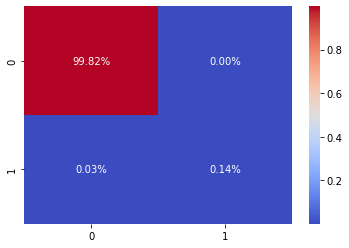

In [31]:
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'coolwarm')

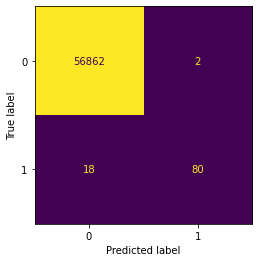

In [32]:
plot_confusion_matrix(cat, X_valid , y_valid  , colorbar= False )

In [33]:
cms = confusion_matrix(y_valid, predictions_final)
cms

array([[56855,     9],
       [   12,    86]], dtype=int64)

In [34]:
print(classification_report(y_valid,predictions_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.88      0.89        98

    accuracy                           1.00     56962
   macro avg       0.95      0.94      0.95     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

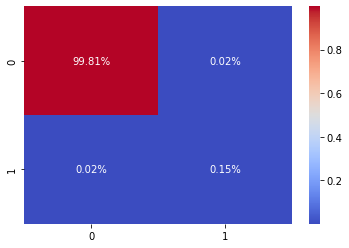

In [35]:
sns.heatmap(cms/np.sum(cms), annot = True, fmt=  '0.2%', cmap = 'coolwarm')

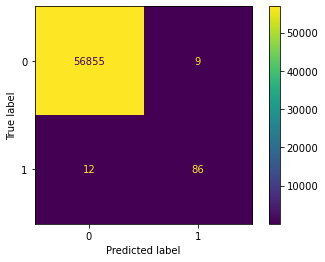

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cms )# colorbar= False )
disp.plot()

## Using the class_weight Parameter in RandomeForestClassifier Algorithm to handle the imbalance

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 

In [38]:
rf =  RandomForestClassifier(class_weight = "balanced")
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)
f1_score2 = f1_score(y_valid,rf_pred)
accuracy_score2 = accuracy_score(y_valid,rf_pred)
print("RandomForest accuracy_score on validation set is : ",accuracy_score(y_valid,rf_pred))
print("RandomForest F1 score on validation set is : ",f1_score(y_valid,rf_pred))
print('--------'*20)

RandomForest accuracy_score on validation set is :  0.9995259997893332
RandomForest F1 score on validation set is :  0.8421052631578948
----------------------------------------------------------------------------------------------------------------------------------------------------------------


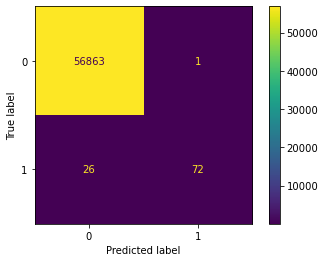

In [39]:
plot_confusion_matrix(rf, X_valid , y_valid)#  , colorbar= False )

In [40]:

train, test = train_test_split(df, test_size=0.2, random_state=42) 


In [41]:
print(len(train))
print(len(test))
print(len(df))

227845
56962
284807


In [42]:
X_test = test.drop(['Class'], axis=1)
y_test = test.Class
print(X_test.columns, X_test.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object') (56962, 30)


## Using Random Sampling Method to undersample the dataset

In [43]:
legit = train[train.Class == 0]
fraud = train[train.Class == 1]

In [44]:
# Undersampling
# Build a sample dataset containing the similar distribution of the normal transactions and Fraudulent Transactions

legit_sample = legit.sample(n=len(fraud))

In [45]:
# concatenating 2 dataset
new_df= pd.concat([legit_sample, fraud], axis = 0)

In [46]:
new_df.Class.value_counts()

0    394
1    394
Name: Class, dtype: int64

In [47]:
# compare the values for both transactions
train.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.548746,0.008685,-0.006526,0.010984,-0.009361,0.006190,0.001874,0.010495,-0.001606,0.005401,...,-0.000178,-0.001062,-0.001240,0.000331,-0.000033,-0.001025,-0.000301,-0.000361,0.000110,0.00036
1,0.460459,-4.483948,3.545405,-6.872751,4.560796,-2.997061,-1.436203,-5.428680,0.705382,-2.561904,...,0.332664,0.737850,0.013141,-0.090059,-0.106440,0.025533,0.062821,0.189716,0.085362,0.09376


In [48]:
# Mean of each column is still approx. same which means sample are still same

new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.531435,-0.310359,-0.037573,-0.004767,0.062001,-0.027434,0.001432,0.015163,-0.044647,-0.062625,...,-0.038244,0.038019,-0.032892,0.057620,-0.005378,-0.016974,-0.033737,0.019162,0.021938,0.050451
1,0.460459,-4.483948,3.545405,-6.872751,4.560796,-2.997061,-1.436203,-5.428680,0.705382,-2.561904,...,0.332664,0.737850,0.013141,-0.090059,-0.106440,0.025533,0.062821,0.189716,0.085362,0.093760


In [49]:
new_df['Class'].value_counts()

0    394
1    394
Name: Class, dtype: int64

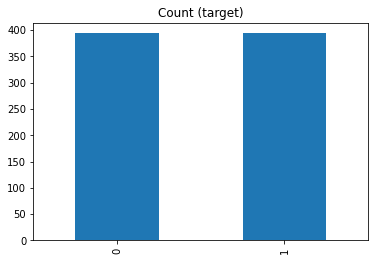

In [50]:
new_df['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Building a Model with the undersampled data

In [51]:
y_undersample = new_df.Class
X_undersample = new_df.drop(['Class'], axis=1)
print(X_undersample.columns, X_undersample.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object') (788, 30)


In [52]:
y_undersample

177292    0
202644    0
86117     0
30011     0
123628    0
         ..
42674     1
33276     1
182992    1
154697    1
226814    1
Name: Class, Length: 788, dtype: int64

In [53]:
# Catboost
cat = CatBoostClassifier(verbose=False)
cat.fit(X_undersample,y_undersample)
cat_pred = cat.predict(X_test)
f1_score1 = f1_score(y_test,cat_pred)
accuracy_score1 = accuracy_score(y_test,cat_pred)
print("CatBoost F1 score on validation set is : ",f1_score(y_test,cat_pred))
print("CatBoost acc score on validation set is : ",accuracy_score(y_test,cat_pred))
print('--------'*20)

#RandomForest
rf =  RandomForestClassifier()
rf.fit(X_undersample,y_undersample)
rf_pred = rf.predict(X_test)
f1_score2 = f1_score(y_test,rf_pred)
accuracy_score2 = accuracy_score(y_test,rf_pred)
print("RandomForest F1 score on validation set is : ",f1_score(y_test,rf_pred))
print("RandomForest acc score on validation set is : ",accuracy_score(y_test,rf_pred))
print('--------'*20)

#DecisionTree
dt =  DecisionTreeClassifier()
dt.fit(X_undersample,y_undersample)
dt_pred = dt.predict(X_test)
f1_score3 = f1_score(y_test,dt_pred)
accuracy_score3 = accuracy_score(y_test,dt_pred)
print("DecisionTree F1 score on validation set is : ",f1_score(y_test,dt_pred))
print("DecisionTree acc score on validation set is : ",accuracy_score(y_test,dt_pred))
print('--------'*20)


#KNeighbors
knn = KNeighborsClassifier()
knn.fit(X_undersample,y_undersample)
knn_pred = knn.predict(X_test)
f1_score4 = f1_score(y_test,knn_pred)
accuracy_score4 = accuracy_score(y_test,knn_pred)
print("KNeighbors F1 score on validation set is : ",f1_score(y_test,knn_pred))
print("KNeighbors acc score on validation set is : ",accuracy_score(y_test,knn_pred))
print('--------'*20)



#SVC
svc =  SVC()
svc.fit(X_undersample,y_undersample)
svc_pred = svc.predict(X_test)
f1_score5 = f1_score(y_test,svc_pred)
accuracy_score5 = accuracy_score(y_test,svc_pred)
print("SVC F1 score on validation set is : ",f1_score(y_test,svc_pred))
print("SVC acc score on validation set is : ",accuracy_score(y_test,svc_pred))
print('--------'*20)

#LinearSVC
lsvc =  LinearSVC()
lsvc.fit(X_undersample,y_undersample)
lsvc_pred = lsvc.predict(X_test)
f1_score6 = f1_score(y_test,lsvc_pred)
accuracy_score6 = accuracy_score(y_test,lsvc_pred)
print("LinearSVC F1 score on validation set is : ",f1_score(y_test,lsvc_pred))
print("LinearSVC acc score on validation set is : ",accuracy_score(y_test,lsvc_pred))
print('--------'*20)

#AdaBoost
ab =  AdaBoostClassifier()
ab.fit(X_undersample,y_undersample)
ab_pred = ab.predict(X_test)
f1_score7 = f1_score(y_test,ab_pred)
accuracy_score7 = accuracy_score(y_test,ab_pred)
print("AdaBoost F1 score on validation set is : ",f1_score(y_test,ab_pred))
print("AdaBoost acc score on validation set is : ",accuracy_score(y_test,ab_pred))
print('--------'*20)

#LogisticRegression
lg =  LogisticRegression()
lg.fit(X_undersample,y_undersample)
lg_pred = lg.predict(X_test)
f1_score8 = f1_score(y_test,lg_pred)
accuracy_score8 = accuracy_score(y_test,lg_pred)
print("LogisticRegression F1 score on validation set is : ",f1_score(y_test,lg_pred))
print("LogisticRegression acc score on validation set is : ",accuracy_score(y_test,lg_pred))
print('--------'*20) 

#Naive Bayes
nb =  GaussianNB()
nb.fit(X_undersample,y_undersample)
nb_pred = nb.predict(X_test)
f1_score9 = f1_score(y_test,nb_pred)
accuracy_score9 = accuracy_score(y_test,nb_pred)
print("Naive Bayes F1 score on validation set is : ",f1_score(y_test,nb_pred))
print("Naive Bayes acc score on validation set is : ",accuracy_score(y_test,nb_pred))
print('--------'*20)

# LGBM
lgb = LGBMClassifier()
lgb.fit(X_undersample,y_undersample)
lgb_pred = lgb.predict(X_test)
f1_score10 = f1_score(y_test,lgb_pred)
accuracy_score10 = accuracy_score(y_test,lgb_pred)
print("LGBM F1 score on validation set is : ",f1_score(y_test,lgb_pred))
print("LGBM acc score on validation set is : ",accuracy_score(y_test,lgb_pred))
print('--------'*20)

# XGBoost
xg = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg.fit(X_undersample,y_undersample)
xg_pred = xg.predict(X_test)
f1_score11 = f1_score(y_test,xg_pred)
accuracy_score11 = accuracy_score(y_test,xg_pred)
print("XGBoost F1 score on validation set is : ",f1_score(y_test,xg_pred))
print("XGBoost acc score on validation set is : ",accuracy_score(y_test,xg_pred))
print('--------'*20)

CatBoost F1 score on validation set is :  0.1261516654854713
CatBoost acc score on validation set is :  0.9783539903795513
----------------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForest F1 score on validation set is :  0.1055753262158956
RandomForest acc score on validation set is :  0.9735262104560936
----------------------------------------------------------------------------------------------------------------------------------------------------------------
DecisionTree F1 score on validation set is :  0.028032866118898023
DecisionTree acc score on validation set is :  0.8940872862610161
----------------------------------------------------------------------------------------------------------------------------------------------------------------
KNeighbors F1 score on validation set is :  0.12155477031802119
KNeighbors acc score on validation set is :  0.978178434745971
---

In [54]:
model_performance = pd.DataFrame({
    "Model": ["CatBoost", "RandomForest", "DecisionTree", "KNeighbors", "SVC", "LinearSVC", 
              "AdaBoost", "LogisticRegression", "NaiveBayes", "LGBM", "XGBoost"],
        
    "F1_Score": [f1_score1, f1_score2, f1_score3, 
              f1_score4, f1_score5, f1_score6, f1_score7, f1_score8, f1_score9, f1_score10, f1_score11],
    "Accuracy": [accuracy_score1, accuracy_score2, accuracy_score3, 
              accuracy_score4, accuracy_score5, accuracy_score6, accuracy_score7, accuracy_score8, accuracy_score9, accuracy_score10, accuracy_score11]
    })

model_performance = model_performance.sort_values(["Accuracy"], ascending=False)
    
print(model_performance)

                 Model  F1_Score  Accuracy
4                  SVC  0.215613  0.988887
5            LinearSVC  0.133236  0.979214
8           NaiveBayes  0.121523  0.978933
0             CatBoost  0.126152  0.978354
3           KNeighbors  0.121555  0.978178
7   LogisticRegression  0.118499  0.976493
1         RandomForest  0.105575  0.973526
9                 LGBM  0.100497  0.971402
10             XGBoost  0.082278  0.964362
6             AdaBoost  0.067482  0.955848
2         DecisionTree  0.028033  0.894087


In [55]:
cm1 = confusion_matrix(y_test, lsvc_pred)
cm1

array([[55687,  1177],
       [    7,    91]], dtype=int64)

In [56]:
print(classification_report(y_test,lsvc_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



<AxesSubplot:>

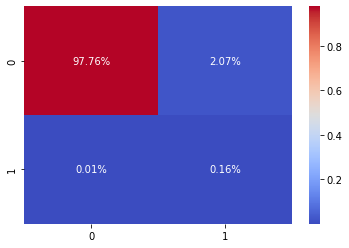

In [57]:
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'coolwarm')

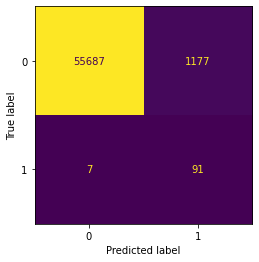

In [58]:
plot_confusion_matrix(lsvc, X_test , y_test  , colorbar= False )

## Using Random Sampling to Oversample data

In [59]:

legit_count, fraud_count = train['Class'].value_counts()

legit = train[train.Class == 0]
fraud = train[train.Class == 1]

print(legit_count)


227451


In [60]:
fraud_sample = fraud.sample(legit_count, replace=True)

newo_df = pd.concat([fraud_sample, legit], axis=0)



In [61]:
newo_df.Class.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [62]:
# Mean of each column is still approx. same which means sample are still same

newo_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.548746,0.008685,-0.006526,0.010984,-0.009361,0.006190,0.001874,0.010495,-0.001606,0.005401,...,-0.000178,-0.001062,-0.001240,0.000331,-0.000033,-0.001025,-0.000301,-0.000361,0.000110,0.000360
1,0.461188,-4.500059,3.547002,-6.880319,4.553880,-3.006158,-1.430473,-5.429631,0.696312,-2.558207,...,0.336159,0.727683,0.017053,-0.085692,-0.106394,0.027219,0.062508,0.186245,0.083987,0.096079


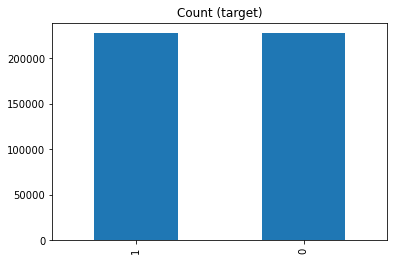

In [63]:
newo_df['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Building a model with oversampled data

In [64]:
y_oversample = newo_df.Class
X_oversample = newo_df.drop(['Class'], axis=1)
print(X_oversample.columns, X_oversample.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object') (454902, 30)


In [65]:
# Catboost
cat = CatBoostClassifier(verbose=False)
cat.fit(X_oversample,y_oversample)
cat_pred = cat.predict(X_test)
f1_score1 = f1_score(y_test,cat_pred)
accuracy_score1 = accuracy_score(y_test,cat_pred)
print("CatBoost F1 score on validation set is : ",f1_score(y_test,cat_pred))
print("CatBoost acc score on validation set is : ",accuracy_score(y_test,cat_pred))
print('--------'*20)

#RandomForest
rf =  RandomForestClassifier()
rf.fit(X_oversample,y_oversample)
rf_pred = rf.predict(X_test)
f1_score2 = f1_score(y_test,rf_pred)
accuracy_score2 = accuracy_score(y_test,rf_pred)
print("RandomForest F1 score on validation set is : ",f1_score(y_test,rf_pred))
print("RandomForest acc score on validation set is : ",accuracy_score(y_test,rf_pred))
print('--------'*20)

#DecisionTree
dt =  DecisionTreeClassifier()
dt.fit(X_oversample,y_oversample)
dt_pred = dt.predict(X_test)
f1_score3 = f1_score(y_test,dt_pred)
accuracy_score3 = accuracy_score(y_test,dt_pred)
print("DecisionTree F1 score on validation set is : ",f1_score(y_test,dt_pred))
print("DecisionTree acc score on validation set is : ",accuracy_score(y_test,dt_pred))
print('--------'*20)


#KNeighbors
knn = KNeighborsClassifier()
knn.fit(X_oversample,y_oversample)
knn_pred = knn.predict(X_test)
f1_score4 = f1_score(y_test,knn_pred)
accuracy_score4 = accuracy_score(y_test,knn_pred)
print("KNeighbors F1 score on validation set is : ",f1_score(y_test,knn_pred))
print("KNeighbors acc score on validation set is : ",accuracy_score(y_test,knn_pred))
print('--------'*20)



#SVC
svc =  SVC()
svc.fit(X_oversample,y_oversample)
svc_pred = svc.predict(X_test)
f1_score5 = f1_score(y_test,svc_pred)
accuracy_score5 = accuracy_score(y_test,svc_pred)
print("SVC F1 score on validation set is : ",f1_score(y_test,svc_pred))
print("SVC acc score on validation set is : ",accuracy_score(y_test,svc_pred))
print('--------'*20)

#LinearSVC
lsvc =  LinearSVC()
lsvc.fit(X_oversample,y_oversample)
lsvc_pred = lsvc.predict(X_test)
f1_score6 = f1_score(y_test,lsvc_pred)
accuracy_score6 = accuracy_score(y_test,lsvc_pred)
print("LinearSVC F1 score on validation set is : ",f1_score(y_test,lsvc_pred))
print("LinearSVC acc score on validation set is : ",accuracy_score(y_test,lsvc_pred))
print('--------'*20)

#AdaBoost
ab =  AdaBoostClassifier()
ab.fit(X_oversample,y_oversample)
ab_pred = ab.predict(X_test)
f1_score7 = f1_score(y_test,ab_pred)
accuracy_score7 = accuracy_score(y_test,ab_pred)
print("AdaBoost F1 score on validation set is : ",f1_score(y_test,ab_pred))
print("AdaBoost acc score on validation set is : ",accuracy_score(y_test,ab_pred))
print('--------'*20)

#LogisticRegression
lg =  LogisticRegression()
lg.fit(X_oversample,y_oversample)
lg_pred = lg.predict(X_test)
f1_score8 = f1_score(y_test,lg_pred)
accuracy_score8 = accuracy_score(y_test,lg_pred)
print("LogisticRegression F1 score on validation set is : ",f1_score(y_test,lg_pred))
print("LogisticRegression acc score on validation set is : ",accuracy_score(y_test,lg_pred))
print('--------'*20) 

#Naive Bayes
nb =  GaussianNB()
nb.fit(X_oversample,y_oversample)
nb_pred = nb.predict(X_test)
f1_score9 = f1_score(y_test,nb_pred)
accuracy_score9 = accuracy_score(y_test,nb_pred)
print("Naive Bayes F1 score on validation set is : ",f1_score(y_test,nb_pred))
print("Naive Bayes acc score on validation set is : ",accuracy_score(y_test,nb_pred))
print('--------'*20)

# LGBM
lgb = LGBMClassifier()
lgb.fit(X_oversample,y_oversample)
lgb_pred = lgb.predict(X_test)
f1_score10 = f1_score(y_test,lgb_pred)
accuracy_score10 = accuracy_score(y_test,lgb_pred)
print("LGBM F1 score on validation set is : ",f1_score(y_test,lgb_pred))
print("LGBM acc score on validation set is : ",accuracy_score(y_test,lgb_pred))
print('--------'*20)

# XGBoost
xg = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg.fit(X_oversample,y_oversample)
xg_pred = xg.predict(X_test)
f1_score11 = f1_score(y_test,xg_pred)
accuracy_score11 = accuracy_score(y_test,xg_pred)
print("XGBoost F1 score on validation set is : ",f1_score(y_test,xg_pred))
print("XGBoost acc score on validation set is : ",accuracy_score(y_test,xg_pred))
print('--------'*20)

CatBoost F1 score on validation set is :  0.8527918781725888
CatBoost acc score on validation set is :  0.9994908886626171
----------------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForest F1 score on validation set is :  0.8700564971751412
RandomForest acc score on validation set is :  0.9995962220427653
----------------------------------------------------------------------------------------------------------------------------------------------------------------
DecisionTree F1 score on validation set is :  0.7329842931937173
DecisionTree acc score on validation set is :  0.9991046662687406
----------------------------------------------------------------------------------------------------------------------------------------------------------------
KNeighbors F1 score on validation set is :  0.7887323943661971
KNeighbors acc score on validation set is :  0.9992099996488887
-----

In [66]:
model_performance = pd.DataFrame({
    "Model": ["CatBoost", "RandomForest", "DecisionTree", "KNeighbors", "SVC", "LinearSVC", 
              "AdaBoost", "LogisticRegression", "NaiveBayes", "LGBM", "XGBoost"],
        
    "F1_Score": [f1_score1, f1_score2, f1_score3, 
              f1_score4, f1_score5, f1_score6, f1_score7, f1_score8, f1_score9, f1_score10, f1_score11],
    "Accuracy": [accuracy_score1, accuracy_score2, accuracy_score3, 
              accuracy_score4, accuracy_score5, accuracy_score6, accuracy_score7, accuracy_score8, accuracy_score9, accuracy_score10, accuracy_score11]
    })

model_performance = model_performance.sort_values(["Accuracy"], ascending=False)
    
print(model_performance)

                 Model  F1_Score  Accuracy
1         RandomForest  0.870056  0.999596
9                 LGBM  0.864583  0.999544
0             CatBoost  0.852792  0.999491
3           KNeighbors  0.788732  0.999210
2         DecisionTree  0.732984  0.999105
10             XGBoost  0.424084  0.996138
4                  SVC  0.183738  0.986430
6             AdaBoost  0.151203  0.982655
5            LinearSVC  0.138568  0.980355
7   LogisticRegression  0.115979  0.975914
8           NaiveBayes  0.101942  0.974018


In [67]:
cm2 = confusion_matrix(y_test, rf_pred)
cm2

array([[56862,     2],
       [   21,    77]], dtype=int64)

In [68]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

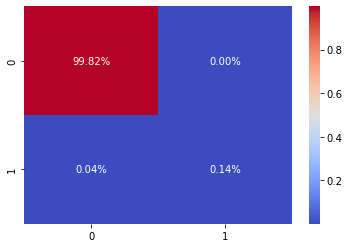

In [69]:
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'coolwarm')

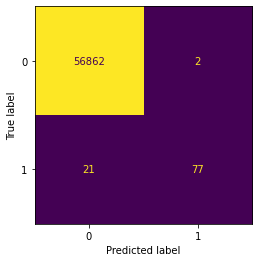

In [70]:
plot_confusion_matrix(rf, X_test , y_test  , colorbar= False )

## Using RandomUnderSampler Algorithm to Undersample the Dataset and Building A Model 

In [71]:
model = CatBoostClassifier()
# define pipeline
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(pipeline, X , y , scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.250


In [72]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42) 
pipe_clf = pipeline.fit(X_train,y_train)
pipe_pred = pipeline.predict(X_valid)
print("pipe_pred F1 score on validation set is : ",f1_score(y_valid,pipe_pred))
print("pipe_pred acc score on validation set is : ",accuracy_score(y_valid,pipe_pred))

Learning rate set to 0.010596
0:	learn: 0.6776749	total: 10ms	remaining: 10s
1:	learn: 0.6635255	total: 19.4ms	remaining: 9.66s
2:	learn: 0.6472933	total: 28.6ms	remaining: 9.51s
3:	learn: 0.6341937	total: 38.2ms	remaining: 9.5s
4:	learn: 0.6186950	total: 47.7ms	remaining: 9.5s
5:	learn: 0.6054937	total: 57ms	remaining: 9.44s
6:	learn: 0.5907666	total: 66.1ms	remaining: 9.37s
7:	learn: 0.5786151	total: 75.4ms	remaining: 9.35s
8:	learn: 0.5659635	total: 84.8ms	remaining: 9.34s
9:	learn: 0.5535925	total: 94ms	remaining: 9.31s
10:	learn: 0.5397534	total: 103ms	remaining: 9.3s
11:	learn: 0.5272592	total: 113ms	remaining: 9.29s
12:	learn: 0.5161718	total: 122ms	remaining: 9.27s
13:	learn: 0.5050241	total: 131ms	remaining: 9.25s
14:	learn: 0.4935364	total: 141ms	remaining: 9.24s
15:	learn: 0.4828486	total: 150ms	remaining: 9.22s
16:	learn: 0.4715102	total: 160ms	remaining: 9.24s
17:	learn: 0.4629295	total: 169ms	remaining: 9.21s
18:	learn: 0.4536257	total: 179ms	remaining: 9.22s
19:	learn: 0

165:	learn: 0.1098833	total: 1.7s	remaining: 8.55s
166:	learn: 0.1095777	total: 1.71s	remaining: 8.54s
167:	learn: 0.1091040	total: 1.72s	remaining: 8.54s
168:	learn: 0.1083443	total: 1.74s	remaining: 8.54s
169:	learn: 0.1078858	total: 1.75s	remaining: 8.54s
170:	learn: 0.1074842	total: 1.76s	remaining: 8.53s
171:	learn: 0.1070067	total: 1.77s	remaining: 8.53s
172:	learn: 0.1066735	total: 1.78s	remaining: 8.51s
173:	learn: 0.1063253	total: 1.79s	remaining: 8.5s
174:	learn: 0.1058731	total: 1.8s	remaining: 8.48s
175:	learn: 0.1056237	total: 1.81s	remaining: 8.48s
176:	learn: 0.1052423	total: 1.82s	remaining: 8.47s
177:	learn: 0.1046684	total: 1.83s	remaining: 8.46s
178:	learn: 0.1041694	total: 1.84s	remaining: 8.46s
179:	learn: 0.1038560	total: 1.85s	remaining: 8.45s
180:	learn: 0.1035141	total: 1.86s	remaining: 8.43s
181:	learn: 0.1030264	total: 1.87s	remaining: 8.42s
182:	learn: 0.1028234	total: 1.88s	remaining: 8.4s
183:	learn: 0.1024984	total: 1.89s	remaining: 8.4s
184:	learn: 0.102

324:	learn: 0.0683054	total: 3.48s	remaining: 7.22s
325:	learn: 0.0682163	total: 3.49s	remaining: 7.21s
326:	learn: 0.0679500	total: 3.5s	remaining: 7.21s
327:	learn: 0.0677540	total: 3.51s	remaining: 7.2s
328:	learn: 0.0675867	total: 3.53s	remaining: 7.19s
329:	learn: 0.0673460	total: 3.54s	remaining: 7.18s
330:	learn: 0.0671713	total: 3.54s	remaining: 7.17s
331:	learn: 0.0670143	total: 3.56s	remaining: 7.15s
332:	learn: 0.0669245	total: 3.57s	remaining: 7.14s
333:	learn: 0.0666685	total: 3.58s	remaining: 7.13s
334:	learn: 0.0664391	total: 3.59s	remaining: 7.12s
335:	learn: 0.0662742	total: 3.6s	remaining: 7.11s
336:	learn: 0.0660536	total: 3.61s	remaining: 7.1s
337:	learn: 0.0658311	total: 3.62s	remaining: 7.09s
338:	learn: 0.0656230	total: 3.63s	remaining: 7.08s
339:	learn: 0.0653655	total: 3.64s	remaining: 7.07s
340:	learn: 0.0651894	total: 3.65s	remaining: 7.05s
341:	learn: 0.0650496	total: 3.66s	remaining: 7.04s
342:	learn: 0.0647669	total: 3.67s	remaining: 7.03s
343:	learn: 0.06

492:	learn: 0.0469981	total: 5.22s	remaining: 5.37s
493:	learn: 0.0468946	total: 5.23s	remaining: 5.36s
494:	learn: 0.0468087	total: 5.24s	remaining: 5.35s
495:	learn: 0.0467812	total: 5.25s	remaining: 5.34s
496:	learn: 0.0466620	total: 5.26s	remaining: 5.33s
497:	learn: 0.0465018	total: 5.28s	remaining: 5.32s
498:	learn: 0.0464313	total: 5.29s	remaining: 5.31s
499:	learn: 0.0463151	total: 5.29s	remaining: 5.29s
500:	learn: 0.0462035	total: 5.3s	remaining: 5.28s
501:	learn: 0.0461506	total: 5.31s	remaining: 5.27s
502:	learn: 0.0460491	total: 5.32s	remaining: 5.26s
503:	learn: 0.0459171	total: 5.33s	remaining: 5.25s
504:	learn: 0.0457309	total: 5.34s	remaining: 5.24s
505:	learn: 0.0456369	total: 5.36s	remaining: 5.23s
506:	learn: 0.0454880	total: 5.37s	remaining: 5.22s
507:	learn: 0.0453439	total: 5.37s	remaining: 5.21s
508:	learn: 0.0452463	total: 5.38s	remaining: 5.19s
509:	learn: 0.0451594	total: 5.39s	remaining: 5.18s
510:	learn: 0.0451207	total: 5.41s	remaining: 5.17s
511:	learn: 0

663:	learn: 0.0330456	total: 6.98s	remaining: 3.53s
664:	learn: 0.0329092	total: 6.99s	remaining: 3.52s
665:	learn: 0.0327781	total: 7s	remaining: 3.51s
666:	learn: 0.0327081	total: 7.01s	remaining: 3.5s
667:	learn: 0.0326733	total: 7.02s	remaining: 3.49s
668:	learn: 0.0326287	total: 7.03s	remaining: 3.48s
669:	learn: 0.0325250	total: 7.04s	remaining: 3.47s
670:	learn: 0.0324981	total: 7.05s	remaining: 3.46s
671:	learn: 0.0324279	total: 7.06s	remaining: 3.45s
672:	learn: 0.0324129	total: 7.07s	remaining: 3.44s
673:	learn: 0.0323695	total: 7.08s	remaining: 3.42s
674:	learn: 0.0323099	total: 7.09s	remaining: 3.41s
675:	learn: 0.0322697	total: 7.1s	remaining: 3.4s
676:	learn: 0.0322258	total: 7.12s	remaining: 3.4s
677:	learn: 0.0322096	total: 7.13s	remaining: 3.38s
678:	learn: 0.0321654	total: 7.13s	remaining: 3.37s
679:	learn: 0.0321054	total: 7.14s	remaining: 3.36s
680:	learn: 0.0320725	total: 7.16s	remaining: 3.35s
681:	learn: 0.0320422	total: 7.17s	remaining: 3.34s
682:	learn: 0.03201

831:	learn: 0.0256624	total: 8.71s	remaining: 1.76s
832:	learn: 0.0256548	total: 8.72s	remaining: 1.75s
833:	learn: 0.0255796	total: 8.73s	remaining: 1.74s
834:	learn: 0.0255556	total: 8.74s	remaining: 1.73s
835:	learn: 0.0255410	total: 8.75s	remaining: 1.72s
836:	learn: 0.0255052	total: 8.76s	remaining: 1.71s
837:	learn: 0.0254483	total: 8.77s	remaining: 1.7s
838:	learn: 0.0254086	total: 8.78s	remaining: 1.69s
839:	learn: 0.0253737	total: 8.79s	remaining: 1.67s
840:	learn: 0.0253096	total: 8.8s	remaining: 1.66s
841:	learn: 0.0252474	total: 8.81s	remaining: 1.65s
842:	learn: 0.0252090	total: 8.82s	remaining: 1.64s
843:	learn: 0.0251939	total: 8.83s	remaining: 1.63s
844:	learn: 0.0251511	total: 8.84s	remaining: 1.62s
845:	learn: 0.0251405	total: 8.85s	remaining: 1.61s
846:	learn: 0.0251015	total: 8.86s	remaining: 1.6s
847:	learn: 0.0250635	total: 8.88s	remaining: 1.59s
848:	learn: 0.0250084	total: 8.89s	remaining: 1.58s
849:	learn: 0.0249866	total: 8.9s	remaining: 1.57s
850:	learn: 0.02

996:	learn: 0.0195802	total: 10.4s	remaining: 31.4ms
997:	learn: 0.0195621	total: 10.5s	remaining: 21ms
998:	learn: 0.0195325	total: 10.5s	remaining: 10.5ms
999:	learn: 0.0194837	total: 10.5s	remaining: 0us
pipe_pred F1 score on validation set is :  0.1736111111111111
pipe_pred acc score on validation set is :  0.986072586402631


## Using RandomOverSampler Algorithm to Oversample the Dataset and Building A Model 

In [73]:
model = CatBoostClassifier()
# define pipeline
over = RandomOverSampler(sampling_strategy=0.5)
steps = [('o', over), ('m', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(pipeline, X , y , scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.840


In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42) 
pipe_clf = pipeline.fit(X_train,y_train)
pipe_pred = pipeline.predict(X_valid)
print("pipe_pred F1 score on validation set is : ",f1_score(y_valid,pipe_pred))
print("pipe_pred acc score on validation set is : ",accuracy_score(y_valid,pipe_pred))

Learning rate set to 0.11742
0:	learn: 0.4825064	total: 139ms	remaining: 2m 18s
1:	learn: 0.3565701	total: 263ms	remaining: 2m 11s
2:	learn: 0.2444179	total: 392ms	remaining: 2m 10s
3:	learn: 0.2034662	total: 499ms	remaining: 2m 4s
4:	learn: 0.1721744	total: 616ms	remaining: 2m 2s
5:	learn: 0.1427552	total: 749ms	remaining: 2m 4s
6:	learn: 0.1282155	total: 879ms	remaining: 2m 4s
7:	learn: 0.1152109	total: 1.03s	remaining: 2m 8s
8:	learn: 0.1046946	total: 1.18s	remaining: 2m 10s
9:	learn: 0.0928910	total: 1.34s	remaining: 2m 12s
10:	learn: 0.0880914	total: 1.52s	remaining: 2m 16s
11:	learn: 0.0832156	total: 1.66s	remaining: 2m 16s
12:	learn: 0.0759871	total: 1.78s	remaining: 2m 14s
13:	learn: 0.0719601	total: 1.91s	remaining: 2m 14s
14:	learn: 0.0686155	total: 2.03s	remaining: 2m 13s
15:	learn: 0.0643232	total: 2.17s	remaining: 2m 13s
16:	learn: 0.0619649	total: 2.3s	remaining: 2m 12s
17:	learn: 0.0568398	total: 2.43s	remaining: 2m 12s
18:	learn: 0.0525786	total: 2.54s	remaining: 2m 11s

159:	learn: 0.0019056	total: 17.9s	remaining: 1m 33s
160:	learn: 0.0018719	total: 18s	remaining: 1m 33s
161:	learn: 0.0018469	total: 18.1s	remaining: 1m 33s
162:	learn: 0.0018083	total: 18.3s	remaining: 1m 33s
163:	learn: 0.0017905	total: 18.4s	remaining: 1m 33s
164:	learn: 0.0017790	total: 18.5s	remaining: 1m 33s
165:	learn: 0.0017468	total: 18.6s	remaining: 1m 33s
166:	learn: 0.0017254	total: 18.7s	remaining: 1m 33s
167:	learn: 0.0017145	total: 18.7s	remaining: 1m 32s
168:	learn: 0.0016859	total: 18.8s	remaining: 1m 32s
169:	learn: 0.0016582	total: 18.9s	remaining: 1m 32s
170:	learn: 0.0016370	total: 19.1s	remaining: 1m 32s
171:	learn: 0.0016188	total: 19.1s	remaining: 1m 32s
172:	learn: 0.0016019	total: 19.2s	remaining: 1m 31s
173:	learn: 0.0015927	total: 19.3s	remaining: 1m 31s
174:	learn: 0.0015494	total: 19.5s	remaining: 1m 31s
175:	learn: 0.0015206	total: 19.6s	remaining: 1m 31s
176:	learn: 0.0015035	total: 19.7s	remaining: 1m 31s
177:	learn: 0.0014749	total: 19.8s	remaining: 1m

317:	learn: 0.0011407	total: 31.7s	remaining: 1m 7s
318:	learn: 0.0011407	total: 31.8s	remaining: 1m 7s
319:	learn: 0.0011407	total: 31.8s	remaining: 1m 7s
320:	learn: 0.0011407	total: 31.9s	remaining: 1m 7s
321:	learn: 0.0011407	total: 32s	remaining: 1m 7s
322:	learn: 0.0011407	total: 32.1s	remaining: 1m 7s
323:	learn: 0.0011407	total: 32.2s	remaining: 1m 7s
324:	learn: 0.0011407	total: 32.2s	remaining: 1m 6s
325:	learn: 0.0011407	total: 32.3s	remaining: 1m 6s
326:	learn: 0.0011407	total: 32.4s	remaining: 1m 6s
327:	learn: 0.0011407	total: 32.4s	remaining: 1m 6s
328:	learn: 0.0011407	total: 32.5s	remaining: 1m 6s
329:	learn: 0.0011407	total: 32.6s	remaining: 1m 6s
330:	learn: 0.0011407	total: 32.7s	remaining: 1m 6s
331:	learn: 0.0011407	total: 32.7s	remaining: 1m 5s
332:	learn: 0.0011407	total: 32.8s	remaining: 1m 5s
333:	learn: 0.0011407	total: 32.9s	remaining: 1m 5s
334:	learn: 0.0011407	total: 33s	remaining: 1m 5s
335:	learn: 0.0011407	total: 33s	remaining: 1m 5s
336:	learn: 0.0011

477:	learn: 0.0011342	total: 44s	remaining: 48s
478:	learn: 0.0011341	total: 44.1s	remaining: 47.9s
479:	learn: 0.0011342	total: 44.1s	remaining: 47.8s
480:	learn: 0.0011341	total: 44.2s	remaining: 47.7s
481:	learn: 0.0011341	total: 44.3s	remaining: 47.6s
482:	learn: 0.0011341	total: 44.4s	remaining: 47.5s
483:	learn: 0.0011341	total: 44.4s	remaining: 47.4s
484:	learn: 0.0011341	total: 44.5s	remaining: 47.3s
485:	learn: 0.0011340	total: 44.6s	remaining: 47.2s
486:	learn: 0.0011340	total: 44.7s	remaining: 47s
487:	learn: 0.0011340	total: 44.7s	remaining: 46.9s
488:	learn: 0.0011340	total: 44.8s	remaining: 46.8s
489:	learn: 0.0011340	total: 44.9s	remaining: 46.7s
490:	learn: 0.0011340	total: 45s	remaining: 46.6s
491:	learn: 0.0011340	total: 45s	remaining: 46.5s
492:	learn: 0.0011340	total: 45.1s	remaining: 46.4s
493:	learn: 0.0011230	total: 45.2s	remaining: 46.3s
494:	learn: 0.0011230	total: 45.3s	remaining: 46.2s
495:	learn: 0.0011230	total: 45.4s	remaining: 46.1s
496:	learn: 0.0011230	

638:	learn: 0.0010528	total: 55.8s	remaining: 31.5s
639:	learn: 0.0010528	total: 55.8s	remaining: 31.4s
640:	learn: 0.0010528	total: 55.9s	remaining: 31.3s
641:	learn: 0.0010528	total: 56s	remaining: 31.2s
642:	learn: 0.0010528	total: 56.1s	remaining: 31.1s
643:	learn: 0.0010528	total: 56.1s	remaining: 31s
644:	learn: 0.0010528	total: 56.2s	remaining: 30.9s
645:	learn: 0.0010528	total: 56.3s	remaining: 30.8s
646:	learn: 0.0010528	total: 56.4s	remaining: 30.7s
647:	learn: 0.0010528	total: 56.4s	remaining: 30.6s
648:	learn: 0.0010528	total: 56.5s	remaining: 30.6s
649:	learn: 0.0010528	total: 56.6s	remaining: 30.5s
650:	learn: 0.0010528	total: 56.6s	remaining: 30.4s
651:	learn: 0.0010528	total: 56.7s	remaining: 30.3s
652:	learn: 0.0010528	total: 56.8s	remaining: 30.2s
653:	learn: 0.0010528	total: 56.8s	remaining: 30.1s
654:	learn: 0.0010528	total: 56.9s	remaining: 30s
655:	learn: 0.0010528	total: 57s	remaining: 29.9s
656:	learn: 0.0010528	total: 57.1s	remaining: 29.8s
657:	learn: 0.001052

800:	learn: 0.0010528	total: 1m 7s	remaining: 16.7s
801:	learn: 0.0010528	total: 1m 7s	remaining: 16.6s
802:	learn: 0.0010528	total: 1m 7s	remaining: 16.6s
803:	learn: 0.0010528	total: 1m 7s	remaining: 16.5s
804:	learn: 0.0010528	total: 1m 7s	remaining: 16.4s
805:	learn: 0.0010528	total: 1m 7s	remaining: 16.3s
806:	learn: 0.0010528	total: 1m 7s	remaining: 16.2s
807:	learn: 0.0010528	total: 1m 7s	remaining: 16.1s
808:	learn: 0.0010528	total: 1m 7s	remaining: 16s
809:	learn: 0.0010528	total: 1m 7s	remaining: 15.9s
810:	learn: 0.0010528	total: 1m 8s	remaining: 15.9s
811:	learn: 0.0010528	total: 1m 8s	remaining: 15.8s
812:	learn: 0.0010528	total: 1m 8s	remaining: 15.7s
813:	learn: 0.0010528	total: 1m 8s	remaining: 15.6s
814:	learn: 0.0010528	total: 1m 8s	remaining: 15.5s
815:	learn: 0.0010528	total: 1m 8s	remaining: 15.5s
816:	learn: 0.0010528	total: 1m 8s	remaining: 15.4s
817:	learn: 0.0010528	total: 1m 8s	remaining: 15.3s
818:	learn: 0.0010528	total: 1m 8s	remaining: 15.2s
819:	learn: 0.

957:	learn: 0.0010082	total: 1m 19s	remaining: 3.48s
958:	learn: 0.0010083	total: 1m 19s	remaining: 3.4s
959:	learn: 0.0010083	total: 1m 19s	remaining: 3.31s
960:	learn: 0.0010083	total: 1m 19s	remaining: 3.23s
961:	learn: 0.0010083	total: 1m 19s	remaining: 3.15s
962:	learn: 0.0010083	total: 1m 19s	remaining: 3.06s
963:	learn: 0.0010083	total: 1m 19s	remaining: 2.98s
964:	learn: 0.0010083	total: 1m 19s	remaining: 2.9s
965:	learn: 0.0010083	total: 1m 19s	remaining: 2.81s
966:	learn: 0.0010083	total: 1m 20s	remaining: 2.73s
967:	learn: 0.0010083	total: 1m 20s	remaining: 2.65s
968:	learn: 0.0010083	total: 1m 20s	remaining: 2.56s
969:	learn: 0.0010083	total: 1m 20s	remaining: 2.48s
970:	learn: 0.0010083	total: 1m 20s	remaining: 2.4s
971:	learn: 0.0010083	total: 1m 20s	remaining: 2.32s
972:	learn: 0.0010083	total: 1m 20s	remaining: 2.23s
973:	learn: 0.0010083	total: 1m 20s	remaining: 2.15s
974:	learn: 0.0010083	total: 1m 20s	remaining: 2.07s
975:	learn: 0.0010083	total: 1m 20s	remaining: 1.

## Using SMOTE Algorithm to Oversample the Dataset and Building A Model 

In [75]:
model = CatBoostClassifier()
# define pipeline
over = SMOTE(sampling_strategy=0.1)

steps = [('o', over), ('m', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X , y , scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.843


In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42) 
pipe_clf = pipeline.fit(X_train,y_train)
pipe_pred = pipeline.predict(X_valid)
print("pipe_pred F1 score on validation set is : ",f1_score(y_valid,pipe_pred))
print("pipe_pred acc score on validation set is : ",accuracy_score(y_valid,pipe_pred))

Learning rate set to 0.102855
0:	learn: 0.4853126	total: 93.3ms	remaining: 1m 33s
1:	learn: 0.3545183	total: 207ms	remaining: 1m 43s
2:	learn: 0.2661060	total: 305ms	remaining: 1m 41s
3:	learn: 0.2024776	total: 398ms	remaining: 1m 39s
4:	learn: 0.1585075	total: 502ms	remaining: 1m 39s
5:	learn: 0.1299687	total: 624ms	remaining: 1m 43s
6:	learn: 0.1112738	total: 729ms	remaining: 1m 43s
7:	learn: 0.0960014	total: 839ms	remaining: 1m 44s
8:	learn: 0.0811291	total: 948ms	remaining: 1m 44s
9:	learn: 0.0718672	total: 1.05s	remaining: 1m 43s
10:	learn: 0.0657049	total: 1.17s	remaining: 1m 44s
11:	learn: 0.0599260	total: 1.26s	remaining: 1m 43s
12:	learn: 0.0566787	total: 1.38s	remaining: 1m 44s
13:	learn: 0.0536745	total: 1.48s	remaining: 1m 44s
14:	learn: 0.0513815	total: 1.57s	remaining: 1m 43s
15:	learn: 0.0498462	total: 1.68s	remaining: 1m 43s
16:	learn: 0.0484660	total: 1.76s	remaining: 1m 42s
17:	learn: 0.0472034	total: 1.86s	remaining: 1m 41s
18:	learn: 0.0460317	total: 1.97s	remaining

158:	learn: 0.0073132	total: 15.6s	remaining: 1m 22s
159:	learn: 0.0072788	total: 15.7s	remaining: 1m 22s
160:	learn: 0.0071944	total: 15.8s	remaining: 1m 22s
161:	learn: 0.0071485	total: 15.9s	remaining: 1m 22s
162:	learn: 0.0071136	total: 16s	remaining: 1m 22s
163:	learn: 0.0070446	total: 16.1s	remaining: 1m 21s
164:	learn: 0.0069624	total: 16.2s	remaining: 1m 21s
165:	learn: 0.0068813	total: 16.3s	remaining: 1m 21s
166:	learn: 0.0068402	total: 16.3s	remaining: 1m 21s
167:	learn: 0.0067505	total: 16.4s	remaining: 1m 21s
168:	learn: 0.0066329	total: 16.5s	remaining: 1m 21s
169:	learn: 0.0065385	total: 16.6s	remaining: 1m 21s
170:	learn: 0.0064610	total: 16.7s	remaining: 1m 21s
171:	learn: 0.0064320	total: 16.8s	remaining: 1m 20s
172:	learn: 0.0064001	total: 16.9s	remaining: 1m 20s
173:	learn: 0.0063615	total: 17s	remaining: 1m 20s
174:	learn: 0.0063357	total: 17.1s	remaining: 1m 20s
175:	learn: 0.0062729	total: 17.2s	remaining: 1m 20s
176:	learn: 0.0062587	total: 17.3s	remaining: 1m 2

314:	learn: 0.0023419	total: 30.4s	remaining: 1m 6s
315:	learn: 0.0023326	total: 30.5s	remaining: 1m 6s
316:	learn: 0.0023251	total: 30.6s	remaining: 1m 5s
317:	learn: 0.0023052	total: 30.7s	remaining: 1m 5s
318:	learn: 0.0022999	total: 30.8s	remaining: 1m 5s
319:	learn: 0.0022706	total: 30.9s	remaining: 1m 5s
320:	learn: 0.0022639	total: 31s	remaining: 1m 5s
321:	learn: 0.0022563	total: 31.1s	remaining: 1m 5s
322:	learn: 0.0022346	total: 31.2s	remaining: 1m 5s
323:	learn: 0.0022191	total: 31.3s	remaining: 1m 5s
324:	learn: 0.0022111	total: 31.4s	remaining: 1m 5s
325:	learn: 0.0021960	total: 31.5s	remaining: 1m 5s
326:	learn: 0.0021737	total: 31.6s	remaining: 1m 4s
327:	learn: 0.0021736	total: 31.6s	remaining: 1m 4s
328:	learn: 0.0021723	total: 31.7s	remaining: 1m 4s
329:	learn: 0.0021643	total: 31.8s	remaining: 1m 4s
330:	learn: 0.0021532	total: 31.9s	remaining: 1m 4s
331:	learn: 0.0021439	total: 32s	remaining: 1m 4s
332:	learn: 0.0021355	total: 32.1s	remaining: 1m 4s
333:	learn: 0.00

475:	learn: 0.0012587	total: 43.7s	remaining: 48.1s
476:	learn: 0.0012587	total: 43.8s	remaining: 48s
477:	learn: 0.0012461	total: 43.8s	remaining: 47.9s
478:	learn: 0.0012461	total: 43.9s	remaining: 47.8s
479:	learn: 0.0012461	total: 44s	remaining: 47.6s
480:	learn: 0.0012329	total: 44.1s	remaining: 47.5s
481:	learn: 0.0012282	total: 44.2s	remaining: 47.5s
482:	learn: 0.0012245	total: 44.3s	remaining: 47.4s
483:	learn: 0.0012181	total: 44.3s	remaining: 47.3s
484:	learn: 0.0012120	total: 44.5s	remaining: 47.2s
485:	learn: 0.0012120	total: 44.5s	remaining: 47.1s
486:	learn: 0.0012086	total: 44.6s	remaining: 47s
487:	learn: 0.0012018	total: 44.7s	remaining: 46.9s
488:	learn: 0.0011941	total: 44.8s	remaining: 46.8s
489:	learn: 0.0011913	total: 44.9s	remaining: 46.7s
490:	learn: 0.0011881	total: 45s	remaining: 46.7s
491:	learn: 0.0011864	total: 45.1s	remaining: 46.5s
492:	learn: 0.0011831	total: 45.2s	remaining: 46.5s
493:	learn: 0.0011831	total: 45.2s	remaining: 46.3s
494:	learn: 0.001174

635:	learn: 0.0009961	total: 53.8s	remaining: 30.8s
636:	learn: 0.0009961	total: 53.8s	remaining: 30.7s
637:	learn: 0.0009961	total: 53.9s	remaining: 30.6s
638:	learn: 0.0009961	total: 53.9s	remaining: 30.5s
639:	learn: 0.0009961	total: 54s	remaining: 30.4s
640:	learn: 0.0009961	total: 54s	remaining: 30.2s
641:	learn: 0.0009961	total: 54.1s	remaining: 30.1s
642:	learn: 0.0009961	total: 54.1s	remaining: 30s
643:	learn: 0.0009961	total: 54.2s	remaining: 29.9s
644:	learn: 0.0009961	total: 54.2s	remaining: 29.8s
645:	learn: 0.0009961	total: 54.3s	remaining: 29.7s
646:	learn: 0.0009961	total: 54.3s	remaining: 29.6s
647:	learn: 0.0009961	total: 54.4s	remaining: 29.5s
648:	learn: 0.0009961	total: 54.4s	remaining: 29.4s
649:	learn: 0.0009961	total: 54.5s	remaining: 29.3s
650:	learn: 0.0009961	total: 54.5s	remaining: 29.2s
651:	learn: 0.0009961	total: 54.6s	remaining: 29.1s
652:	learn: 0.0009961	total: 54.6s	remaining: 29s
653:	learn: 0.0009961	total: 54.6s	remaining: 28.9s
654:	learn: 0.000996

796:	learn: 0.0009961	total: 1m 1s	remaining: 15.7s
797:	learn: 0.0009961	total: 1m 1s	remaining: 15.7s
798:	learn: 0.0009961	total: 1m 1s	remaining: 15.6s
799:	learn: 0.0009961	total: 1m 1s	remaining: 15.5s
800:	learn: 0.0009961	total: 1m 1s	remaining: 15.4s
801:	learn: 0.0009961	total: 1m 2s	remaining: 15.3s
802:	learn: 0.0009961	total: 1m 2s	remaining: 15.2s
803:	learn: 0.0009961	total: 1m 2s	remaining: 15.2s
804:	learn: 0.0009961	total: 1m 2s	remaining: 15.1s
805:	learn: 0.0009961	total: 1m 2s	remaining: 15s
806:	learn: 0.0009961	total: 1m 2s	remaining: 14.9s
807:	learn: 0.0009961	total: 1m 2s	remaining: 14.8s
808:	learn: 0.0009961	total: 1m 2s	remaining: 14.7s
809:	learn: 0.0009961	total: 1m 2s	remaining: 14.6s
810:	learn: 0.0009961	total: 1m 2s	remaining: 14.6s
811:	learn: 0.0009961	total: 1m 2s	remaining: 14.5s
812:	learn: 0.0009961	total: 1m 2s	remaining: 14.4s
813:	learn: 0.0009961	total: 1m 2s	remaining: 14.3s
814:	learn: 0.0009961	total: 1m 2s	remaining: 14.2s
815:	learn: 0.

956:	learn: 0.0009350	total: 1m 11s	remaining: 3.2s
957:	learn: 0.0009350	total: 1m 11s	remaining: 3.13s
958:	learn: 0.0009350	total: 1m 11s	remaining: 3.05s
959:	learn: 0.0009350	total: 1m 11s	remaining: 2.98s
960:	learn: 0.0009328	total: 1m 11s	remaining: 2.9s
961:	learn: 0.0009233	total: 1m 11s	remaining: 2.83s
962:	learn: 0.0009233	total: 1m 11s	remaining: 2.75s
963:	learn: 0.0009172	total: 1m 11s	remaining: 2.68s
964:	learn: 0.0009172	total: 1m 11s	remaining: 2.6s
965:	learn: 0.0009172	total: 1m 11s	remaining: 2.53s
966:	learn: 0.0009172	total: 1m 11s	remaining: 2.45s
967:	learn: 0.0009172	total: 1m 11s	remaining: 2.38s
968:	learn: 0.0009172	total: 1m 12s	remaining: 2.3s
969:	learn: 0.0009172	total: 1m 12s	remaining: 2.23s
970:	learn: 0.0009172	total: 1m 12s	remaining: 2.15s
971:	learn: 0.0009172	total: 1m 12s	remaining: 2.08s
972:	learn: 0.0009172	total: 1m 12s	remaining: 2s
973:	learn: 0.0009172	total: 1m 12s	remaining: 1.93s
974:	learn: 0.0009172	total: 1m 12s	remaining: 1.85s


## Using NearMiss Algorithm to Undersample the Dataset and Building A Model 

In [77]:
model = CatBoostClassifier()
# define pipeline

under = NearMiss(sampling_strategy=0.5)
steps = [ ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X , y , scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.005


In [78]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42) 
pipe_clf = pipeline.fit(X_train,y_train)
pipe_pred = pipeline.predict(X_valid)
print("pipe_pred F1 score on validation set is : ",f1_score(y_valid,pipe_pred))
print("pipe_pred acc score on validation set is : ",accuracy_score(y_valid,pipe_pred))

Learning rate set to 0.010596
0:	learn: 0.6771837	total: 9.95ms	remaining: 9.94s
1:	learn: 0.6610733	total: 19.3ms	remaining: 9.64s
2:	learn: 0.6453878	total: 28.3ms	remaining: 9.4s
3:	learn: 0.6304200	total: 37.5ms	remaining: 9.34s
4:	learn: 0.6128079	total: 46.6ms	remaining: 9.28s
5:	learn: 0.5982584	total: 57.5ms	remaining: 9.53s
6:	learn: 0.5854928	total: 68.6ms	remaining: 9.73s
7:	learn: 0.5691715	total: 78.1ms	remaining: 9.68s
8:	learn: 0.5553805	total: 87.8ms	remaining: 9.66s
9:	learn: 0.5436846	total: 97.1ms	remaining: 9.62s
10:	learn: 0.5292594	total: 106ms	remaining: 9.57s
11:	learn: 0.5176857	total: 116ms	remaining: 9.52s
12:	learn: 0.5034539	total: 125ms	remaining: 9.47s
13:	learn: 0.4903327	total: 134ms	remaining: 9.43s
14:	learn: 0.4789810	total: 143ms	remaining: 9.4s
15:	learn: 0.4691517	total: 153ms	remaining: 9.38s
16:	learn: 0.4567792	total: 162ms	remaining: 9.37s
17:	learn: 0.4475134	total: 171ms	remaining: 9.35s
18:	learn: 0.4387321	total: 181ms	remaining: 9.32s
19:

170:	learn: 0.0755899	total: 1.72s	remaining: 8.35s
171:	learn: 0.0753072	total: 1.73s	remaining: 8.34s
172:	learn: 0.0748651	total: 1.74s	remaining: 8.34s
173:	learn: 0.0746521	total: 1.75s	remaining: 8.33s
174:	learn: 0.0742471	total: 1.76s	remaining: 8.31s
175:	learn: 0.0738905	total: 1.77s	remaining: 8.3s
176:	learn: 0.0736895	total: 1.78s	remaining: 8.28s
177:	learn: 0.0733196	total: 1.79s	remaining: 8.27s
178:	learn: 0.0728501	total: 1.8s	remaining: 8.26s
179:	learn: 0.0725444	total: 1.81s	remaining: 8.25s
180:	learn: 0.0722545	total: 1.82s	remaining: 8.24s
181:	learn: 0.0718372	total: 1.83s	remaining: 8.22s
182:	learn: 0.0716012	total: 1.84s	remaining: 8.21s
183:	learn: 0.0712763	total: 1.85s	remaining: 8.2s
184:	learn: 0.0709039	total: 1.86s	remaining: 8.19s
185:	learn: 0.0705779	total: 1.87s	remaining: 8.17s
186:	learn: 0.0702414	total: 1.88s	remaining: 8.16s
187:	learn: 0.0699685	total: 1.89s	remaining: 8.14s
188:	learn: 0.0697519	total: 1.89s	remaining: 8.13s
189:	learn: 0.0

332:	learn: 0.0445994	total: 3.28s	remaining: 6.57s
333:	learn: 0.0445265	total: 3.29s	remaining: 6.56s
334:	learn: 0.0444125	total: 3.3s	remaining: 6.55s
335:	learn: 0.0443015	total: 3.31s	remaining: 6.54s
336:	learn: 0.0442030	total: 3.32s	remaining: 6.53s
337:	learn: 0.0440986	total: 3.33s	remaining: 6.52s
338:	learn: 0.0439475	total: 3.34s	remaining: 6.51s
339:	learn: 0.0437753	total: 3.35s	remaining: 6.5s
340:	learn: 0.0436842	total: 3.36s	remaining: 6.49s
341:	learn: 0.0435998	total: 3.37s	remaining: 6.48s
342:	learn: 0.0434660	total: 3.38s	remaining: 6.46s
343:	learn: 0.0433685	total: 3.38s	remaining: 6.45s
344:	learn: 0.0432682	total: 3.39s	remaining: 6.44s
345:	learn: 0.0431698	total: 3.4s	remaining: 6.43s
346:	learn: 0.0430218	total: 3.41s	remaining: 6.42s
347:	learn: 0.0429007	total: 3.42s	remaining: 6.41s
348:	learn: 0.0428291	total: 3.43s	remaining: 6.4s
349:	learn: 0.0426968	total: 3.44s	remaining: 6.39s
350:	learn: 0.0426027	total: 3.45s	remaining: 6.38s
351:	learn: 0.04

493:	learn: 0.0307435	total: 4.82s	remaining: 4.93s
494:	learn: 0.0306571	total: 4.83s	remaining: 4.92s
495:	learn: 0.0305941	total: 4.84s	remaining: 4.92s
496:	learn: 0.0305435	total: 4.85s	remaining: 4.91s
497:	learn: 0.0305099	total: 4.86s	remaining: 4.9s
498:	learn: 0.0304497	total: 4.87s	remaining: 4.89s
499:	learn: 0.0303915	total: 4.88s	remaining: 4.88s
500:	learn: 0.0303493	total: 4.89s	remaining: 4.87s
501:	learn: 0.0302863	total: 4.9s	remaining: 4.86s
502:	learn: 0.0302150	total: 4.91s	remaining: 4.85s
503:	learn: 0.0301576	total: 4.92s	remaining: 4.84s
504:	learn: 0.0300892	total: 4.92s	remaining: 4.83s
505:	learn: 0.0300306	total: 4.93s	remaining: 4.82s
506:	learn: 0.0299993	total: 4.94s	remaining: 4.81s
507:	learn: 0.0299511	total: 4.95s	remaining: 4.8s
508:	learn: 0.0298745	total: 4.96s	remaining: 4.79s
509:	learn: 0.0298338	total: 4.97s	remaining: 4.78s
510:	learn: 0.0297978	total: 4.98s	remaining: 4.77s
511:	learn: 0.0297396	total: 4.99s	remaining: 4.76s
512:	learn: 0.0

671:	learn: 0.0222760	total: 6.56s	remaining: 3.2s
672:	learn: 0.0222219	total: 6.57s	remaining: 3.19s
673:	learn: 0.0222034	total: 6.58s	remaining: 3.18s
674:	learn: 0.0221792	total: 6.59s	remaining: 3.17s
675:	learn: 0.0221487	total: 6.6s	remaining: 3.16s
676:	learn: 0.0221286	total: 6.61s	remaining: 3.15s
677:	learn: 0.0221025	total: 6.62s	remaining: 3.15s
678:	learn: 0.0220689	total: 6.63s	remaining: 3.13s
679:	learn: 0.0220112	total: 6.64s	remaining: 3.13s
680:	learn: 0.0219732	total: 6.65s	remaining: 3.12s
681:	learn: 0.0219466	total: 6.66s	remaining: 3.1s
682:	learn: 0.0219127	total: 6.67s	remaining: 3.1s
683:	learn: 0.0218525	total: 6.68s	remaining: 3.08s
684:	learn: 0.0218160	total: 6.69s	remaining: 3.08s
685:	learn: 0.0217683	total: 6.7s	remaining: 3.06s
686:	learn: 0.0217452	total: 6.71s	remaining: 3.06s
687:	learn: 0.0216972	total: 6.71s	remaining: 3.04s
688:	learn: 0.0216472	total: 6.72s	remaining: 3.04s
689:	learn: 0.0216033	total: 6.74s	remaining: 3.02s
690:	learn: 0.021

847:	learn: 0.0168658	total: 8.28s	remaining: 1.49s
848:	learn: 0.0168505	total: 8.3s	remaining: 1.48s
849:	learn: 0.0168287	total: 8.31s	remaining: 1.47s
850:	learn: 0.0168040	total: 8.32s	remaining: 1.46s
851:	learn: 0.0167643	total: 8.33s	remaining: 1.45s
852:	learn: 0.0167348	total: 8.34s	remaining: 1.44s
853:	learn: 0.0167098	total: 8.35s	remaining: 1.43s
854:	learn: 0.0166894	total: 8.36s	remaining: 1.42s
855:	learn: 0.0166512	total: 8.37s	remaining: 1.41s
856:	learn: 0.0166209	total: 8.38s	remaining: 1.4s
857:	learn: 0.0165935	total: 8.38s	remaining: 1.39s
858:	learn: 0.0165809	total: 8.39s	remaining: 1.38s
859:	learn: 0.0165671	total: 8.4s	remaining: 1.37s
860:	learn: 0.0165519	total: 8.41s	remaining: 1.36s
861:	learn: 0.0165206	total: 8.42s	remaining: 1.35s
862:	learn: 0.0164901	total: 8.43s	remaining: 1.34s
863:	learn: 0.0164737	total: 8.44s	remaining: 1.33s
864:	learn: 0.0164529	total: 8.45s	remaining: 1.32s
865:	learn: 0.0164313	total: 8.46s	remaining: 1.31s
866:	learn: 0.0

## Using RandomUnderSampler and RandomOverSampler Algorithm together to transform the Dataset and Building A Model 

In [79]:
model = CatBoostClassifier()
# define pipeline
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X , y , scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.791


In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42) 
pipe_clf = pipeline.fit(X_train,y_train)
pipe_pred = pipeline.predict(X_valid)
print("pipe_pred F1 score on validation set is : ",f1_score(y_valid,pipe_pred))
print("pipe_pred acc score on validation set is : ",accuracy_score(y_valid,pipe_pred))

Learning rate set to 0.059058
0:	learn: 0.5748469	total: 31.4ms	remaining: 31.4s
1:	learn: 0.4902209	total: 59.9ms	remaining: 29.9s
2:	learn: 0.4223224	total: 88.7ms	remaining: 29.5s
3:	learn: 0.3640129	total: 117ms	remaining: 29.1s
4:	learn: 0.3059272	total: 150ms	remaining: 29.9s
5:	learn: 0.2767032	total: 181ms	remaining: 29.9s
6:	learn: 0.2468106	total: 226ms	remaining: 32s
7:	learn: 0.2232281	total: 257ms	remaining: 31.9s
8:	learn: 0.2029958	total: 286ms	remaining: 31.5s
9:	learn: 0.1854595	total: 314ms	remaining: 31.1s
10:	learn: 0.1736370	total: 341ms	remaining: 30.7s
11:	learn: 0.1612310	total: 370ms	remaining: 30.5s
12:	learn: 0.1513094	total: 400ms	remaining: 30.4s
13:	learn: 0.1391780	total: 429ms	remaining: 30.2s
14:	learn: 0.1309227	total: 467ms	remaining: 30.7s
15:	learn: 0.1210952	total: 500ms	remaining: 30.8s
16:	learn: 0.1163005	total: 527ms	remaining: 30.5s
17:	learn: 0.1103897	total: 555ms	remaining: 30.3s
18:	learn: 0.1043653	total: 582ms	remaining: 30.1s
19:	learn:

165:	learn: 0.0075063	total: 5.03s	remaining: 25.3s
166:	learn: 0.0074240	total: 5.06s	remaining: 25.2s
167:	learn: 0.0073931	total: 5.09s	remaining: 25.2s
168:	learn: 0.0073424	total: 5.12s	remaining: 25.2s
169:	learn: 0.0072996	total: 5.14s	remaining: 25.1s
170:	learn: 0.0072352	total: 5.17s	remaining: 25.1s
171:	learn: 0.0071823	total: 5.2s	remaining: 25s
172:	learn: 0.0071087	total: 5.22s	remaining: 25s
173:	learn: 0.0070549	total: 5.26s	remaining: 25s
174:	learn: 0.0070011	total: 5.29s	remaining: 24.9s
175:	learn: 0.0069213	total: 5.32s	remaining: 24.9s
176:	learn: 0.0068705	total: 5.34s	remaining: 24.8s
177:	learn: 0.0068489	total: 5.37s	remaining: 24.8s
178:	learn: 0.0067735	total: 5.4s	remaining: 24.8s
179:	learn: 0.0066570	total: 5.43s	remaining: 24.7s
180:	learn: 0.0065842	total: 5.45s	remaining: 24.7s
181:	learn: 0.0064802	total: 5.49s	remaining: 24.7s
182:	learn: 0.0064289	total: 5.52s	remaining: 24.6s
183:	learn: 0.0064036	total: 5.54s	remaining: 24.6s
184:	learn: 0.006360

327:	learn: 0.0023636	total: 9.58s	remaining: 19.6s
328:	learn: 0.0023414	total: 9.61s	remaining: 19.6s
329:	learn: 0.0023199	total: 9.64s	remaining: 19.6s
330:	learn: 0.0023072	total: 9.67s	remaining: 19.5s
331:	learn: 0.0022957	total: 9.69s	remaining: 19.5s
332:	learn: 0.0022830	total: 9.72s	remaining: 19.5s
333:	learn: 0.0022596	total: 9.75s	remaining: 19.4s
334:	learn: 0.0022498	total: 9.78s	remaining: 19.4s
335:	learn: 0.0022439	total: 9.81s	remaining: 19.4s
336:	learn: 0.0022437	total: 9.83s	remaining: 19.3s
337:	learn: 0.0022437	total: 9.85s	remaining: 19.3s
338:	learn: 0.0022321	total: 9.88s	remaining: 19.3s
339:	learn: 0.0022169	total: 9.91s	remaining: 19.2s
340:	learn: 0.0022116	total: 9.93s	remaining: 19.2s
341:	learn: 0.0022116	total: 9.96s	remaining: 19.2s
342:	learn: 0.0022116	total: 9.98s	remaining: 19.1s
343:	learn: 0.0022116	total: 10s	remaining: 19.1s
344:	learn: 0.0022040	total: 10s	remaining: 19.1s
345:	learn: 0.0021941	total: 10.1s	remaining: 19s
346:	learn: 0.0021

488:	learn: 0.0018368	total: 13.8s	remaining: 14.4s
489:	learn: 0.0018368	total: 13.8s	remaining: 14.4s
490:	learn: 0.0018368	total: 13.8s	remaining: 14.3s
491:	learn: 0.0018367	total: 13.9s	remaining: 14.3s
492:	learn: 0.0018367	total: 13.9s	remaining: 14.3s
493:	learn: 0.0018367	total: 13.9s	remaining: 14.2s
494:	learn: 0.0018367	total: 13.9s	remaining: 14.2s
495:	learn: 0.0018367	total: 13.9s	remaining: 14.2s
496:	learn: 0.0018367	total: 14s	remaining: 14.1s
497:	learn: 0.0018367	total: 14s	remaining: 14.1s
498:	learn: 0.0018367	total: 14s	remaining: 14.1s
499:	learn: 0.0018367	total: 14s	remaining: 14s
500:	learn: 0.0018367	total: 14.1s	remaining: 14s
501:	learn: 0.0018367	total: 14.1s	remaining: 14s
502:	learn: 0.0018367	total: 14.1s	remaining: 13.9s
503:	learn: 0.0018367	total: 14.1s	remaining: 13.9s
504:	learn: 0.0018367	total: 14.2s	remaining: 13.9s
505:	learn: 0.0018367	total: 14.2s	remaining: 13.8s
506:	learn: 0.0018367	total: 14.2s	remaining: 13.8s
507:	learn: 0.0018367	tota

654:	learn: 0.0017819	total: 17.9s	remaining: 9.45s
655:	learn: 0.0017819	total: 18s	remaining: 9.42s
656:	learn: 0.0017819	total: 18s	remaining: 9.39s
657:	learn: 0.0017819	total: 18s	remaining: 9.36s
658:	learn: 0.0017819	total: 18s	remaining: 9.33s
659:	learn: 0.0017819	total: 18.1s	remaining: 9.3s
660:	learn: 0.0017819	total: 18.1s	remaining: 9.27s
661:	learn: 0.0017819	total: 18.1s	remaining: 9.24s
662:	learn: 0.0017819	total: 18.1s	remaining: 9.21s
663:	learn: 0.0017819	total: 18.2s	remaining: 9.19s
664:	learn: 0.0017819	total: 18.2s	remaining: 9.16s
665:	learn: 0.0017819	total: 18.2s	remaining: 9.13s
666:	learn: 0.0017819	total: 18.2s	remaining: 9.1s
667:	learn: 0.0017819	total: 18.3s	remaining: 9.07s
668:	learn: 0.0017819	total: 18.3s	remaining: 9.04s
669:	learn: 0.0017819	total: 18.3s	remaining: 9.02s
670:	learn: 0.0017819	total: 18.3s	remaining: 8.99s
671:	learn: 0.0017819	total: 18.4s	remaining: 8.96s
672:	learn: 0.0017819	total: 18.4s	remaining: 8.93s
673:	learn: 0.0017819	

815:	learn: 0.0017570	total: 21.9s	remaining: 4.94s
816:	learn: 0.0017570	total: 21.9s	remaining: 4.91s
817:	learn: 0.0017570	total: 22s	remaining: 4.89s
818:	learn: 0.0017480	total: 22s	remaining: 4.86s
819:	learn: 0.0017480	total: 22s	remaining: 4.83s
820:	learn: 0.0017480	total: 22s	remaining: 4.8s
821:	learn: 0.0017480	total: 22.1s	remaining: 4.78s
822:	learn: 0.0017480	total: 22.1s	remaining: 4.75s
823:	learn: 0.0017480	total: 22.1s	remaining: 4.72s
824:	learn: 0.0017480	total: 22.1s	remaining: 4.7s
825:	learn: 0.0017480	total: 22.2s	remaining: 4.67s
826:	learn: 0.0017480	total: 22.2s	remaining: 4.64s
827:	learn: 0.0017480	total: 22.2s	remaining: 4.61s
828:	learn: 0.0017480	total: 22.2s	remaining: 4.58s
829:	learn: 0.0017480	total: 22.3s	remaining: 4.56s
830:	learn: 0.0017480	total: 22.3s	remaining: 4.53s
831:	learn: 0.0017480	total: 22.3s	remaining: 4.5s
832:	learn: 0.0017480	total: 22.3s	remaining: 4.47s
833:	learn: 0.0017480	total: 22.3s	remaining: 4.45s
834:	learn: 0.0017480	t

981:	learn: 0.0017290	total: 25.9s	remaining: 474ms
982:	learn: 0.0017291	total: 25.9s	remaining: 448ms
983:	learn: 0.0017290	total: 25.9s	remaining: 421ms
984:	learn: 0.0017290	total: 25.9s	remaining: 395ms
985:	learn: 0.0017290	total: 26s	remaining: 369ms
986:	learn: 0.0017290	total: 26s	remaining: 342ms
987:	learn: 0.0017290	total: 26s	remaining: 316ms
988:	learn: 0.0017290	total: 26s	remaining: 289ms
989:	learn: 0.0017290	total: 26s	remaining: 263ms
990:	learn: 0.0017290	total: 26.1s	remaining: 237ms
991:	learn: 0.0017290	total: 26.1s	remaining: 210ms
992:	learn: 0.0017290	total: 26.1s	remaining: 184ms
993:	learn: 0.0017290	total: 26.1s	remaining: 158ms
994:	learn: 0.0017290	total: 26.2s	remaining: 132ms
995:	learn: 0.0017290	total: 26.2s	remaining: 105ms
996:	learn: 0.0017290	total: 26.2s	remaining: 78.9ms
997:	learn: 0.0017290	total: 26.2s	remaining: 52.6ms
998:	learn: 0.0017290	total: 26.3s	remaining: 26.3ms
999:	learn: 0.0017290	total: 26.3s	remaining: 0us
pipe_pred F1 score on

## Using RandomUnderSampler and SMOTE Algorithm together to transform the Dataset and Building A Model 

In [81]:
model = CatBoostClassifier()
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X , y , scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.666


In [82]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42) 
pipe_clf = pipeline.fit(X_train,y_train)
pipe_pred = pipeline.predict(X_valid)
print("pipe_pred F1 score on validation set is : ",f1_score(y_valid,pipe_pred))
print("pipe_pred acc score on validation set is : ",accuracy_score(y_valid,pipe_pred))

Learning rate set to 0.059058
0:	learn: 0.5824081	total: 53.6ms	remaining: 53.5s
1:	learn: 0.4929946	total: 102ms	remaining: 51s
2:	learn: 0.4289323	total: 149ms	remaining: 49.6s
3:	learn: 0.3676876	total: 191ms	remaining: 47.7s
4:	learn: 0.3197237	total: 243ms	remaining: 48.3s
5:	learn: 0.2800538	total: 292ms	remaining: 48.4s
6:	learn: 0.2493457	total: 337ms	remaining: 47.9s
7:	learn: 0.2260964	total: 383ms	remaining: 47.5s
8:	learn: 0.2094483	total: 425ms	remaining: 46.8s
9:	learn: 0.1936736	total: 476ms	remaining: 47.1s
10:	learn: 0.1809459	total: 520ms	remaining: 46.7s
11:	learn: 0.1702510	total: 562ms	remaining: 46.3s
12:	learn: 0.1599563	total: 608ms	remaining: 46.1s
13:	learn: 0.1510387	total: 654ms	remaining: 46s
14:	learn: 0.1448496	total: 702ms	remaining: 46.1s
15:	learn: 0.1395802	total: 746ms	remaining: 45.9s
16:	learn: 0.1338653	total: 791ms	remaining: 45.8s
17:	learn: 0.1296417	total: 837ms	remaining: 45.7s
18:	learn: 0.1243694	total: 881ms	remaining: 45.5s
19:	learn: 0.1

165:	learn: 0.0206543	total: 6.8s	remaining: 34.2s
166:	learn: 0.0205855	total: 6.84s	remaining: 34.1s
167:	learn: 0.0204712	total: 6.87s	remaining: 34s
168:	learn: 0.0204056	total: 6.91s	remaining: 34s
169:	learn: 0.0202923	total: 6.95s	remaining: 33.9s
170:	learn: 0.0202273	total: 6.98s	remaining: 33.9s
171:	learn: 0.0201201	total: 7.03s	remaining: 33.8s
172:	learn: 0.0200031	total: 7.07s	remaining: 33.8s
173:	learn: 0.0198608	total: 7.1s	remaining: 33.7s
174:	learn: 0.0196334	total: 7.14s	remaining: 33.7s
175:	learn: 0.0195662	total: 7.18s	remaining: 33.6s
176:	learn: 0.0194589	total: 7.22s	remaining: 33.6s
177:	learn: 0.0192701	total: 7.26s	remaining: 33.5s
178:	learn: 0.0191426	total: 7.3s	remaining: 33.5s
179:	learn: 0.0190496	total: 7.34s	remaining: 33.4s
180:	learn: 0.0189187	total: 7.38s	remaining: 33.4s
181:	learn: 0.0187149	total: 7.42s	remaining: 33.4s
182:	learn: 0.0185836	total: 7.46s	remaining: 33.3s
183:	learn: 0.0184585	total: 7.5s	remaining: 33.3s
184:	learn: 0.018344

326:	learn: 0.0085076	total: 12.8s	remaining: 26.3s
327:	learn: 0.0084974	total: 12.8s	remaining: 26.3s
328:	learn: 0.0084675	total: 12.8s	remaining: 26.2s
329:	learn: 0.0084218	total: 12.9s	remaining: 26.2s
330:	learn: 0.0083353	total: 12.9s	remaining: 26.1s
331:	learn: 0.0082880	total: 13s	remaining: 26.1s
332:	learn: 0.0082365	total: 13s	remaining: 26s
333:	learn: 0.0082248	total: 13s	remaining: 26s
334:	learn: 0.0081954	total: 13.1s	remaining: 25.9s
335:	learn: 0.0081284	total: 13.1s	remaining: 25.9s
336:	learn: 0.0080659	total: 13.1s	remaining: 25.8s
337:	learn: 0.0080345	total: 13.2s	remaining: 25.8s
338:	learn: 0.0080214	total: 13.2s	remaining: 25.7s
339:	learn: 0.0079619	total: 13.2s	remaining: 25.7s
340:	learn: 0.0078963	total: 13.3s	remaining: 25.7s
341:	learn: 0.0078598	total: 13.3s	remaining: 25.6s
342:	learn: 0.0078238	total: 13.4s	remaining: 25.6s
343:	learn: 0.0077697	total: 13.4s	remaining: 25.5s
344:	learn: 0.0077052	total: 13.4s	remaining: 25.5s
345:	learn: 0.0076933	

490:	learn: 0.0043081	total: 17.8s	remaining: 18.4s
491:	learn: 0.0042955	total: 17.8s	remaining: 18.4s
492:	learn: 0.0042643	total: 17.9s	remaining: 18.4s
493:	learn: 0.0042469	total: 17.9s	remaining: 18.3s
494:	learn: 0.0042143	total: 17.9s	remaining: 18.3s
495:	learn: 0.0042143	total: 17.9s	remaining: 18.2s
496:	learn: 0.0042038	total: 18s	remaining: 18.2s
497:	learn: 0.0041811	total: 18s	remaining: 18.1s
498:	learn: 0.0041811	total: 18s	remaining: 18.1s
499:	learn: 0.0041660	total: 18.1s	remaining: 18.1s
500:	learn: 0.0041660	total: 18.1s	remaining: 18s
501:	learn: 0.0041592	total: 18.1s	remaining: 18s
502:	learn: 0.0041478	total: 18.1s	remaining: 17.9s
503:	learn: 0.0041478	total: 18.2s	remaining: 17.9s
504:	learn: 0.0041356	total: 18.2s	remaining: 17.8s
505:	learn: 0.0041302	total: 18.2s	remaining: 17.8s
506:	learn: 0.0041302	total: 18.2s	remaining: 17.7s
507:	learn: 0.0041086	total: 18.3s	remaining: 17.7s
508:	learn: 0.0041086	total: 18.3s	remaining: 17.7s
509:	learn: 0.0041086	

650:	learn: 0.0032760	total: 22s	remaining: 11.8s
651:	learn: 0.0032760	total: 22s	remaining: 11.7s
652:	learn: 0.0032760	total: 22s	remaining: 11.7s
653:	learn: 0.0032760	total: 22s	remaining: 11.7s
654:	learn: 0.0032760	total: 22.1s	remaining: 11.6s
655:	learn: 0.0032760	total: 22.1s	remaining: 11.6s
656:	learn: 0.0032760	total: 22.1s	remaining: 11.5s
657:	learn: 0.0032760	total: 22.1s	remaining: 11.5s
658:	learn: 0.0032760	total: 22.2s	remaining: 11.5s
659:	learn: 0.0032760	total: 22.2s	remaining: 11.4s
660:	learn: 0.0032760	total: 22.2s	remaining: 11.4s
661:	learn: 0.0032760	total: 22.2s	remaining: 11.3s
662:	learn: 0.0032759	total: 22.2s	remaining: 11.3s
663:	learn: 0.0032759	total: 22.3s	remaining: 11.3s
664:	learn: 0.0032759	total: 22.3s	remaining: 11.2s
665:	learn: 0.0032759	total: 22.3s	remaining: 11.2s
666:	learn: 0.0032759	total: 22.3s	remaining: 11.2s
667:	learn: 0.0032759	total: 22.4s	remaining: 11.1s
668:	learn: 0.0032759	total: 22.4s	remaining: 11.1s
669:	learn: 0.003275

813:	learn: 0.0032620	total: 25.6s	remaining: 5.86s
814:	learn: 0.0032620	total: 25.7s	remaining: 5.83s
815:	learn: 0.0032439	total: 25.7s	remaining: 5.79s
816:	learn: 0.0032335	total: 25.7s	remaining: 5.76s
817:	learn: 0.0032335	total: 25.8s	remaining: 5.73s
818:	learn: 0.0032335	total: 25.8s	remaining: 5.7s
819:	learn: 0.0032335	total: 25.8s	remaining: 5.66s
820:	learn: 0.0032335	total: 25.8s	remaining: 5.63s
821:	learn: 0.0032335	total: 25.8s	remaining: 5.59s
822:	learn: 0.0032335	total: 25.9s	remaining: 5.56s
823:	learn: 0.0032335	total: 25.9s	remaining: 5.53s
824:	learn: 0.0032335	total: 25.9s	remaining: 5.5s
825:	learn: 0.0032335	total: 25.9s	remaining: 5.46s
826:	learn: 0.0032335	total: 26s	remaining: 5.43s
827:	learn: 0.0032335	total: 26s	remaining: 5.39s
828:	learn: 0.0032335	total: 26s	remaining: 5.36s
829:	learn: 0.0032335	total: 26s	remaining: 5.33s
830:	learn: 0.0032335	total: 26s	remaining: 5.29s
831:	learn: 0.0032335	total: 26.1s	remaining: 5.26s
832:	learn: 0.0032335	to

975:	learn: 0.0032274	total: 29.3s	remaining: 722ms
976:	learn: 0.0032274	total: 29.4s	remaining: 692ms
977:	learn: 0.0032274	total: 29.4s	remaining: 661ms
978:	learn: 0.0032273	total: 29.4s	remaining: 631ms
979:	learn: 0.0032273	total: 29.4s	remaining: 601ms
980:	learn: 0.0032273	total: 29.5s	remaining: 571ms
981:	learn: 0.0032273	total: 29.5s	remaining: 540ms
982:	learn: 0.0032273	total: 29.5s	remaining: 510ms
983:	learn: 0.0032273	total: 29.5s	remaining: 480ms
984:	learn: 0.0032273	total: 29.6s	remaining: 450ms
985:	learn: 0.0032273	total: 29.6s	remaining: 420ms
986:	learn: 0.0032273	total: 29.6s	remaining: 390ms
987:	learn: 0.0032273	total: 29.6s	remaining: 360ms
988:	learn: 0.0032273	total: 29.6s	remaining: 330ms
989:	learn: 0.0032273	total: 29.7s	remaining: 300ms
990:	learn: 0.0032273	total: 29.7s	remaining: 270ms
991:	learn: 0.0032273	total: 29.7s	remaining: 240ms
992:	learn: 0.0032273	total: 29.7s	remaining: 210ms
993:	learn: 0.0032273	total: 29.8s	remaining: 180ms
994:	learn: 

## Using SMOTE and NearMiss Algorithm together to transform the Dataset and Building A Model 

In [83]:
model = CatBoostClassifier()
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = NearMiss(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X , y , scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.222


In [84]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42) 
pipe_clf = pipeline.fit(X_train,y_train)
pipe_pred = pipeline.predict(X_valid)
print("pipe_pred F1 score on validation set is : ",f1_score(y_valid,pipe_pred))
print("pipe_pred acc score on validation set is : ",accuracy_score(y_valid,pipe_pred))

Learning rate set to 0.059058
0:	learn: 0.5797612	total: 30.6ms	remaining: 30.5s
1:	learn: 0.4855360	total: 61.7ms	remaining: 30.8s
2:	learn: 0.4082336	total: 88.6ms	remaining: 29.4s
3:	learn: 0.3517743	total: 115ms	remaining: 28.5s
4:	learn: 0.3072259	total: 141ms	remaining: 28s
5:	learn: 0.2752424	total: 167ms	remaining: 27.7s
6:	learn: 0.2447457	total: 194ms	remaining: 27.6s
7:	learn: 0.2166969	total: 233ms	remaining: 28.9s
8:	learn: 0.2014045	total: 267ms	remaining: 29.4s
9:	learn: 0.1813065	total: 297ms	remaining: 29.4s
10:	learn: 0.1670364	total: 326ms	remaining: 29.3s
11:	learn: 0.1579825	total: 354ms	remaining: 29.2s
12:	learn: 0.1489604	total: 381ms	remaining: 29s
13:	learn: 0.1410177	total: 417ms	remaining: 29.4s
14:	learn: 0.1333342	total: 449ms	remaining: 29.5s
15:	learn: 0.1282322	total: 476ms	remaining: 29.3s
16:	learn: 0.1224948	total: 506ms	remaining: 29.2s
17:	learn: 0.1187390	total: 532ms	remaining: 29s
18:	learn: 0.1150486	total: 557ms	remaining: 28.8s
19:	learn: 0.1

168:	learn: 0.0209885	total: 5.31s	remaining: 26.1s
169:	learn: 0.0207625	total: 5.34s	remaining: 26.1s
170:	learn: 0.0205550	total: 5.37s	remaining: 26s
171:	learn: 0.0204072	total: 5.4s	remaining: 26s
172:	learn: 0.0202418	total: 5.43s	remaining: 25.9s
173:	learn: 0.0201192	total: 5.46s	remaining: 25.9s
174:	learn: 0.0199940	total: 5.49s	remaining: 25.9s
175:	learn: 0.0198696	total: 5.51s	remaining: 25.8s
176:	learn: 0.0197557	total: 5.55s	remaining: 25.8s
177:	learn: 0.0196489	total: 5.58s	remaining: 25.8s
178:	learn: 0.0195194	total: 5.61s	remaining: 25.7s
179:	learn: 0.0194004	total: 5.64s	remaining: 25.7s
180:	learn: 0.0192580	total: 5.67s	remaining: 25.7s
181:	learn: 0.0190949	total: 5.7s	remaining: 25.6s
182:	learn: 0.0189703	total: 5.73s	remaining: 25.6s
183:	learn: 0.0187656	total: 5.76s	remaining: 25.5s
184:	learn: 0.0186893	total: 5.79s	remaining: 25.5s
185:	learn: 0.0185737	total: 5.82s	remaining: 25.5s
186:	learn: 0.0184193	total: 5.85s	remaining: 25.4s
187:	learn: 0.0183

329:	learn: 0.0077552	total: 10.1s	remaining: 20.6s
330:	learn: 0.0077224	total: 10.2s	remaining: 20.5s
331:	learn: 0.0076939	total: 10.2s	remaining: 20.5s
332:	learn: 0.0076696	total: 10.2s	remaining: 20.5s
333:	learn: 0.0076337	total: 10.3s	remaining: 20.4s
334:	learn: 0.0075925	total: 10.3s	remaining: 20.4s
335:	learn: 0.0075865	total: 10.3s	remaining: 20.4s
336:	learn: 0.0075230	total: 10.3s	remaining: 20.3s
337:	learn: 0.0075054	total: 10.4s	remaining: 20.3s
338:	learn: 0.0074564	total: 10.4s	remaining: 20.3s
339:	learn: 0.0074431	total: 10.4s	remaining: 20.2s
340:	learn: 0.0074194	total: 10.5s	remaining: 20.2s
341:	learn: 0.0074035	total: 10.5s	remaining: 20.2s
342:	learn: 0.0073680	total: 10.5s	remaining: 20.1s
343:	learn: 0.0073564	total: 10.5s	remaining: 20.1s
344:	learn: 0.0073250	total: 10.6s	remaining: 20.1s
345:	learn: 0.0072843	total: 10.6s	remaining: 20s
346:	learn: 0.0072316	total: 10.6s	remaining: 20s
347:	learn: 0.0072096	total: 10.7s	remaining: 20s
348:	learn: 0.0071

491:	learn: 0.0039830	total: 14.9s	remaining: 15.4s
492:	learn: 0.0039695	total: 15s	remaining: 15.4s
493:	learn: 0.0039455	total: 15s	remaining: 15.3s
494:	learn: 0.0039296	total: 15s	remaining: 15.3s
495:	learn: 0.0039192	total: 15s	remaining: 15.3s
496:	learn: 0.0039159	total: 15.1s	remaining: 15.2s
497:	learn: 0.0038904	total: 15.1s	remaining: 15.2s
498:	learn: 0.0038766	total: 15.1s	remaining: 15.2s
499:	learn: 0.0038649	total: 15.2s	remaining: 15.2s
500:	learn: 0.0038487	total: 15.2s	remaining: 15.1s
501:	learn: 0.0038306	total: 15.2s	remaining: 15.1s
502:	learn: 0.0038306	total: 15.2s	remaining: 15.1s
503:	learn: 0.0038207	total: 15.3s	remaining: 15s
504:	learn: 0.0038094	total: 15.3s	remaining: 15s
505:	learn: 0.0037959	total: 15.3s	remaining: 15s
506:	learn: 0.0037805	total: 15.3s	remaining: 14.9s
507:	learn: 0.0037653	total: 15.4s	remaining: 14.9s
508:	learn: 0.0037380	total: 15.4s	remaining: 14.9s
509:	learn: 0.0037380	total: 15.4s	remaining: 14.8s
510:	learn: 0.0037312	tota

653:	learn: 0.0026705	total: 20s	remaining: 10.6s
654:	learn: 0.0026581	total: 20s	remaining: 10.5s
655:	learn: 0.0026488	total: 20s	remaining: 10.5s
656:	learn: 0.0026355	total: 20.1s	remaining: 10.5s
657:	learn: 0.0026354	total: 20.1s	remaining: 10.4s
658:	learn: 0.0026312	total: 20.1s	remaining: 10.4s
659:	learn: 0.0026185	total: 20.1s	remaining: 10.4s
660:	learn: 0.0026106	total: 20.2s	remaining: 10.3s
661:	learn: 0.0026013	total: 20.2s	remaining: 10.3s
662:	learn: 0.0025935	total: 20.2s	remaining: 10.3s
663:	learn: 0.0025860	total: 20.3s	remaining: 10.3s
664:	learn: 0.0025806	total: 20.3s	remaining: 10.2s
665:	learn: 0.0025698	total: 20.3s	remaining: 10.2s
666:	learn: 0.0025634	total: 20.3s	remaining: 10.2s
667:	learn: 0.0025536	total: 20.4s	remaining: 10.1s
668:	learn: 0.0025447	total: 20.4s	remaining: 10.1s
669:	learn: 0.0025305	total: 20.4s	remaining: 10.1s
670:	learn: 0.0025249	total: 20.5s	remaining: 10s
671:	learn: 0.0025189	total: 20.5s	remaining: 10s
672:	learn: 0.0025115	

816:	learn: 0.0023487	total: 24.2s	remaining: 5.43s
817:	learn: 0.0023488	total: 24.3s	remaining: 5.4s
818:	learn: 0.0023487	total: 24.3s	remaining: 5.37s
819:	learn: 0.0023487	total: 24.3s	remaining: 5.34s
820:	learn: 0.0023487	total: 24.3s	remaining: 5.31s
821:	learn: 0.0023487	total: 24.4s	remaining: 5.28s
822:	learn: 0.0023487	total: 24.4s	remaining: 5.25s
823:	learn: 0.0023487	total: 24.4s	remaining: 5.21s
824:	learn: 0.0023487	total: 24.4s	remaining: 5.18s
825:	learn: 0.0023487	total: 24.5s	remaining: 5.15s
826:	learn: 0.0023487	total: 24.5s	remaining: 5.12s
827:	learn: 0.0023487	total: 24.5s	remaining: 5.09s
828:	learn: 0.0023487	total: 24.5s	remaining: 5.06s
829:	learn: 0.0023487	total: 24.6s	remaining: 5.03s
830:	learn: 0.0023487	total: 24.6s	remaining: 5s
831:	learn: 0.0023487	total: 24.6s	remaining: 4.97s
832:	learn: 0.0023487	total: 24.6s	remaining: 4.94s
833:	learn: 0.0023486	total: 24.7s	remaining: 4.91s
834:	learn: 0.0023486	total: 24.7s	remaining: 4.88s
835:	learn: 0.00

982:	learn: 0.0022845	total: 28.5s	remaining: 492ms
983:	learn: 0.0022844	total: 28.5s	remaining: 463ms
984:	learn: 0.0022845	total: 28.5s	remaining: 434ms
985:	learn: 0.0022844	total: 28.5s	remaining: 405ms
986:	learn: 0.0022844	total: 28.6s	remaining: 376ms
987:	learn: 0.0022844	total: 28.6s	remaining: 347ms
988:	learn: 0.0022844	total: 28.6s	remaining: 318ms
989:	learn: 0.0022844	total: 28.6s	remaining: 289ms
990:	learn: 0.0022844	total: 28.7s	remaining: 260ms
991:	learn: 0.0022844	total: 28.7s	remaining: 231ms
992:	learn: 0.0022844	total: 28.7s	remaining: 202ms
993:	learn: 0.0022844	total: 28.7s	remaining: 174ms
994:	learn: 0.0022844	total: 28.8s	remaining: 145ms
995:	learn: 0.0022844	total: 28.8s	remaining: 116ms
996:	learn: 0.0022844	total: 28.8s	remaining: 86.7ms
997:	learn: 0.0022844	total: 28.8s	remaining: 57.8ms
998:	learn: 0.0022844	total: 28.9s	remaining: 28.9ms
999:	learn: 0.0022844	total: 28.9s	remaining: 0us
pipe_pred F1 score on validation set is :  0.27192982456140347
